In [ ]:
!pip install tensorflow==2.9.1 -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.65.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21

In [ ]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
#from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import ReLU,Lambda,Dropout,Add, Input, Dense,Dropout,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
#from tensorflow.keras.losses import KLDivergence

from tensorflow.keras import optimizers, initializers, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
%matplotlib inline

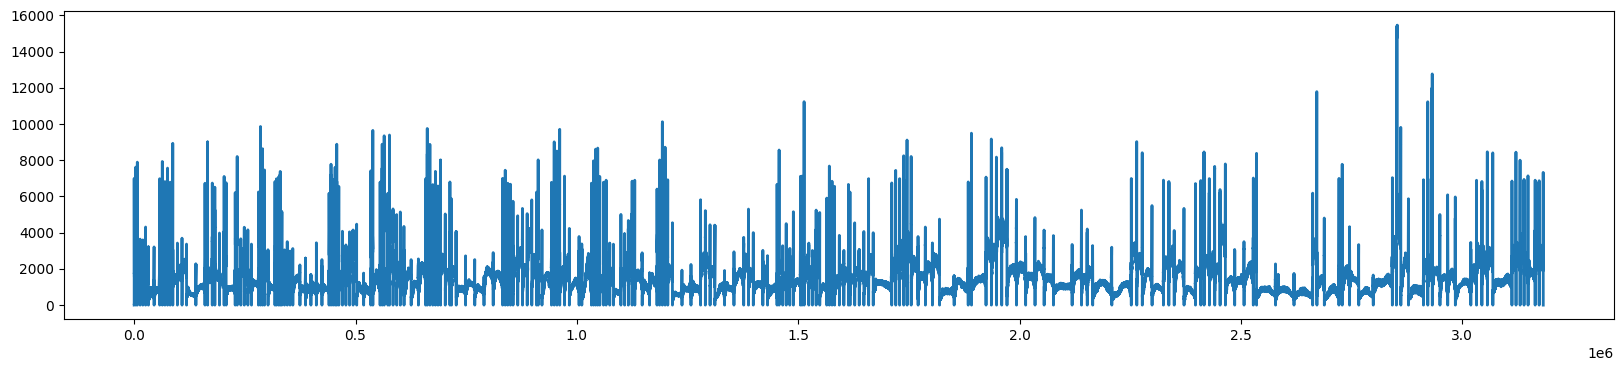

In [ ]:
df.index.freq = 'TimeMS'
df.shape
df.columns
plt.figure(figsize=(20, 4))
plt.plot(df.avg_current, linewidth=2)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame 'df'

cols = ['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type']

measures = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output', 'Anomaly_At_Time_ms', 'id', 'TimeMS']

measures_1 = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output']




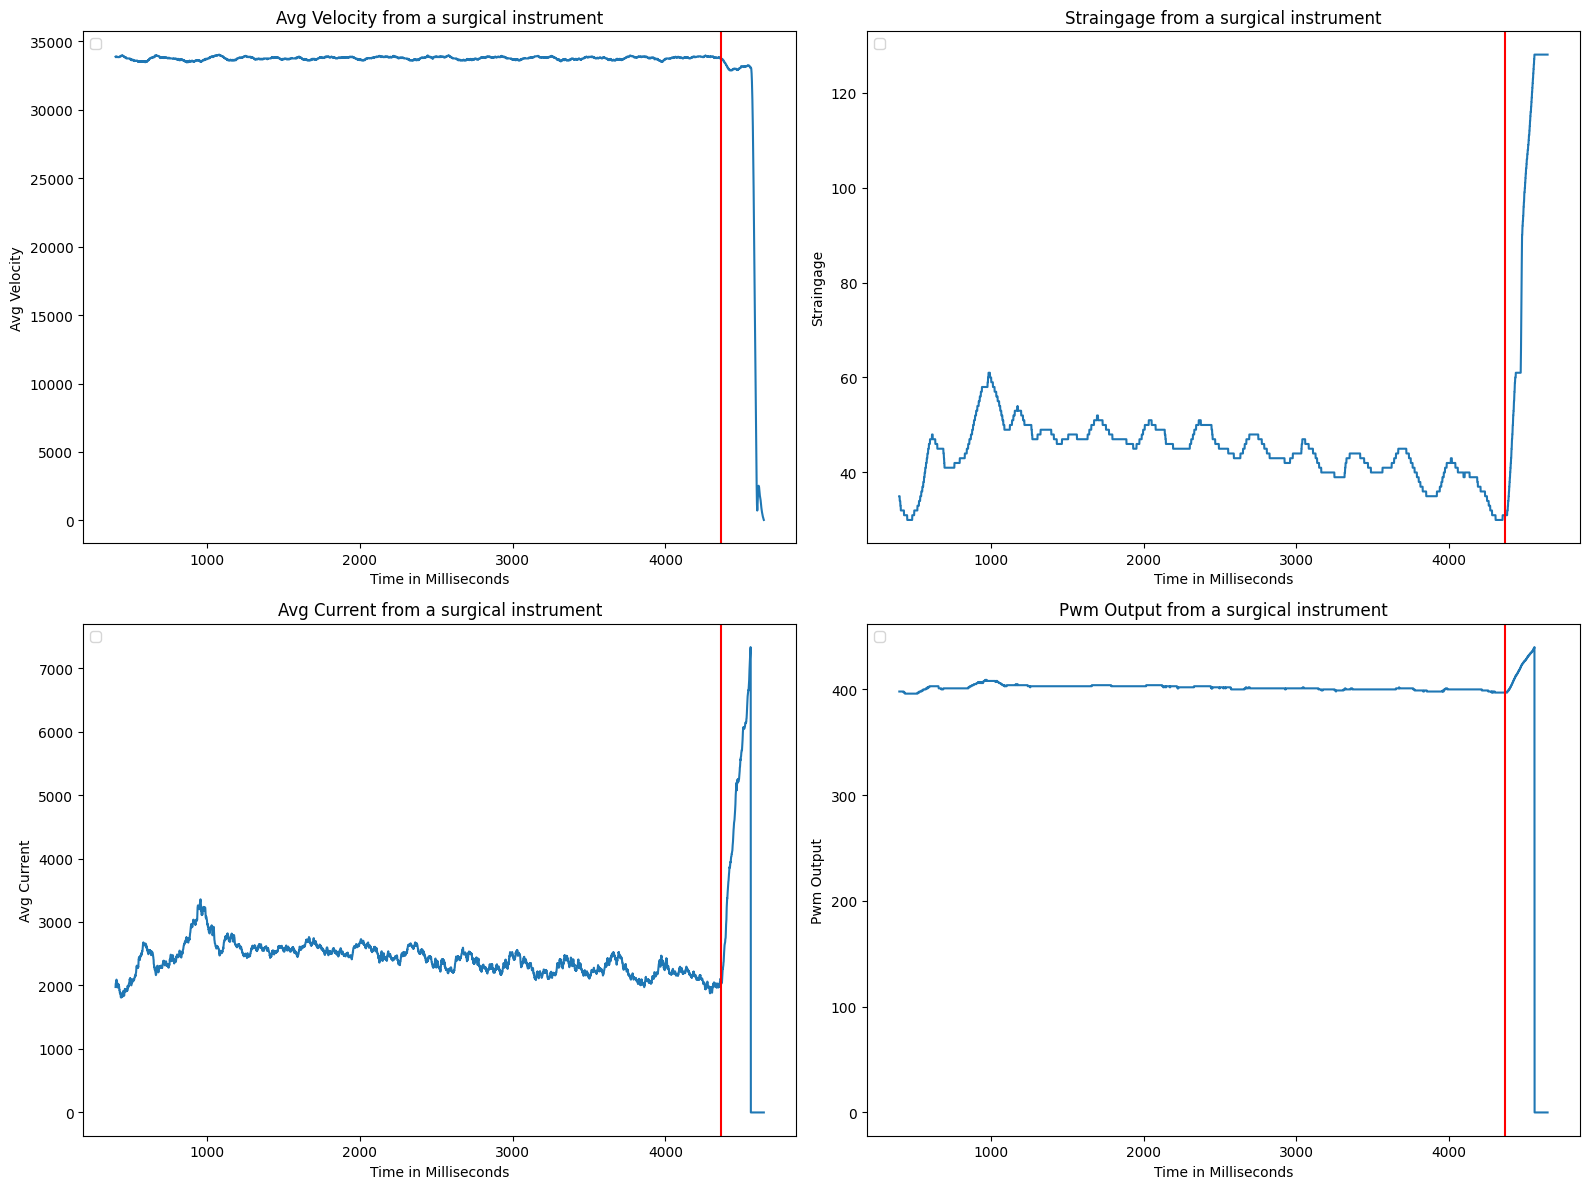

In [ ]:
def plot_measure(df):
    e = np.unique(df['Anomaly_At_Time_ms'])[0]
    df = df[df.TimeMS > 400]

    plt.figure(figsize=(16, 12))

    for i, measure in enumerate(measures_1):  # Loop through the measures_1 list
        plt.subplot(2, 2, i + 1)
        plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
        plt.xlabel('Time in Milliseconds')
        plt.ylabel(measure.replace('_', ' ').title())
        plt.plot(df['TimeMS'], df[measure])
        plt.legend(loc="upper left")
        plt.axvline(e, color='r')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

df_97 = df[df["id"] == 97]

fig1 = plot_measure(df_97)

In [ ]:
cols = ['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type']

measures = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output', 'Anomaly_At_Time_ms', 'id', 'TimeMS']
measures_1=['avg_current']
for i in range(1,6):
  measure=measures[i-1]
  print(measure.title())
df=df[measures]

Avg_Velocity
Straingage
Avg_Current
Pwm_Output
Anomaly_At_Time_Ms


In [ ]:
def plot_measure(df):
  e=np.unique(df['Anomaly_At_Time_ms'])[0]
  df=df[df.TimeMS > 400]
  #plt.plot('TimeMS','StrainGage',data=df)
  #plt.plot('TimeMS','Avg_Velocity',data=df)
  plt.figure(figsize=(16,12))
  for i in range(1,5):
    measure=measures_1[i-1]
    plt.subplot(2,2,i)
    plt.title(measure.title() + ' from a surgical instrument')
    # naming the x axis
    plt.xlabel('Time in Milliseconds')
    # naming the y axis
    plt.ylabel(measure.title())
    plt.plot('TimeMS',measure,data=df)
    #plt.plot('TimeMS','avg_current',data=df)
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')
  plt.show()

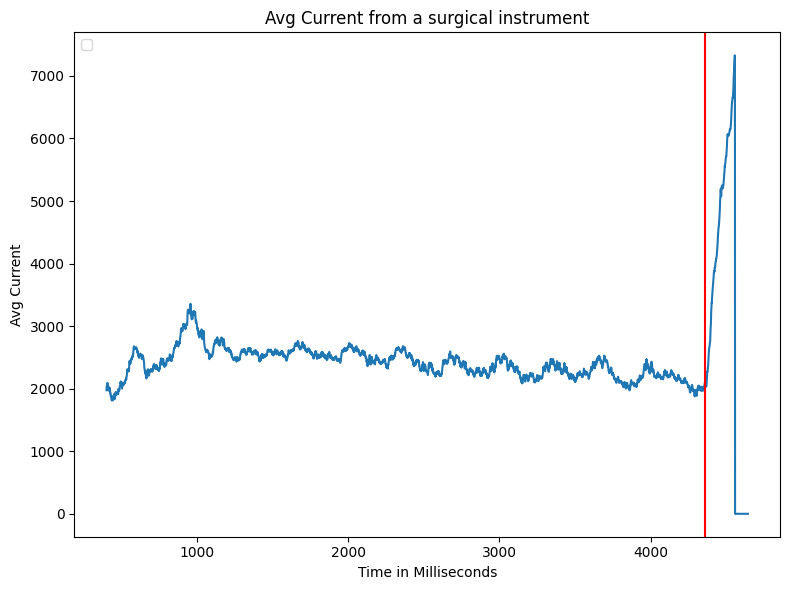

In [ ]:

def plot_avg_current(df):
    e = np.unique(df['Anomaly_At_Time_ms'])[0]
    df = df[df.TimeMS > 400]

    plt.figure(figsize=(8, 6))

    measure = measures_1[0]  # Since there's only one measure, no need for a loop
    plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
    plt.xlabel('Time in Milliseconds')
    plt.ylabel(measure.replace('_', ' ').title())
    plt.plot(df['TimeMS'], df[measure])
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')

    plt.tight_layout()  # Adjust spacing
    plt.savefig('plot4.eps', format='eps')
    plt.show()
measures_1=['avg_current']
df_97 = df[df["id"] == 97]

plot_avg_current(df_97)

In [ ]:
df[['TimeMS','id']].groupby('id').count()

,TimeMS
id,
2,3764
3,3681
4,7436
5,7468
6,7376
...,...
366,12422
368,22102
370,12286


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your DataFrame is named 'df'
# ... (previous code to define 'df' and other steps)

# Step 6: Pad sequences to ensure each 'id' has the same length as the maximum sequence length
max_seq_length = df[['TimeMS', 'id']].groupby('id').count().max().values[0]

# Create a dictionary to store sequences for each 'id' group
id_sequences = {}

# Group data by 'id' and store sequences in the dictionary
for id_group in df.groupby('id'):
    id_value, group_df = id_group
    sequence = group_df['TimeMS'].values
    id_sequences[id_value] = sequence

# Pad each sequence individually using the pad_sequences function for 'TimeMS'
padded_sequences = [pad_sequences([sequence], maxlen=max_seq_length, padding='pre', value=0)[0] for sequence in id_sequences.values()]

# Initialize a dictionary to store the padded sequences for each column
padded_data_dict = {}

# Pad each sequence individually using the pad_sequences function for other columns
for col in df.columns:
    if col not in ['TimeMS', 'id']:
        sequences = [group_df[col].values for _, group_df in df.groupby('id')]
        padded_sequences_col = [pad_sequences([sequence], maxlen=max_seq_length, padding='pre', value=0)[0] for sequence in sequences]
        padded_data_dict[col] = np.concatenate(padded_sequences_col, axis=0)

# Add 'Padded_TimeMS' column to the dictionary
padded_data_dict['Padded_TimeMS'] = np.concatenate(padded_sequences, axis=0)

# Add 'id' column to the dictionary
padded_data_dict['id'] = np.repeat(df['id'].unique(), max_seq_length)

# Create the final DataFrame with padded sequences for all columns
padded_df = pd.DataFrame(data=padded_data_dict)

# Now, 'padded_df' contains the data with padded sequences, and each 'id' has the same length as the maximum sequence length


In [ ]:
padded_df[['Padded_TimeMS','id']].groupby('id').count()



,Padded_TimeMS
id,
2,43968
3,43968
4,43968
5,43968
6,43968
...,...
366,43968
368,43968
370,43968


In [ ]:
import pandas as pd

# Assuming your dataset is already loaded into the DataFrame called "padded_df"
# If not, you can load it from your data source using pd.read_csv or any other method.

# Add a new column "Label" and initialize it with 0
padded_df['Label'] = 0

# Update "Label" to 1 for rows where "Padded_TimeMS" is greater than "Anomaly_At_Time_ms"
padded_df.loc[padded_df['Padded_TimeMS'] > padded_df['Anomaly_At_Time_ms'], 'Label'] = 1



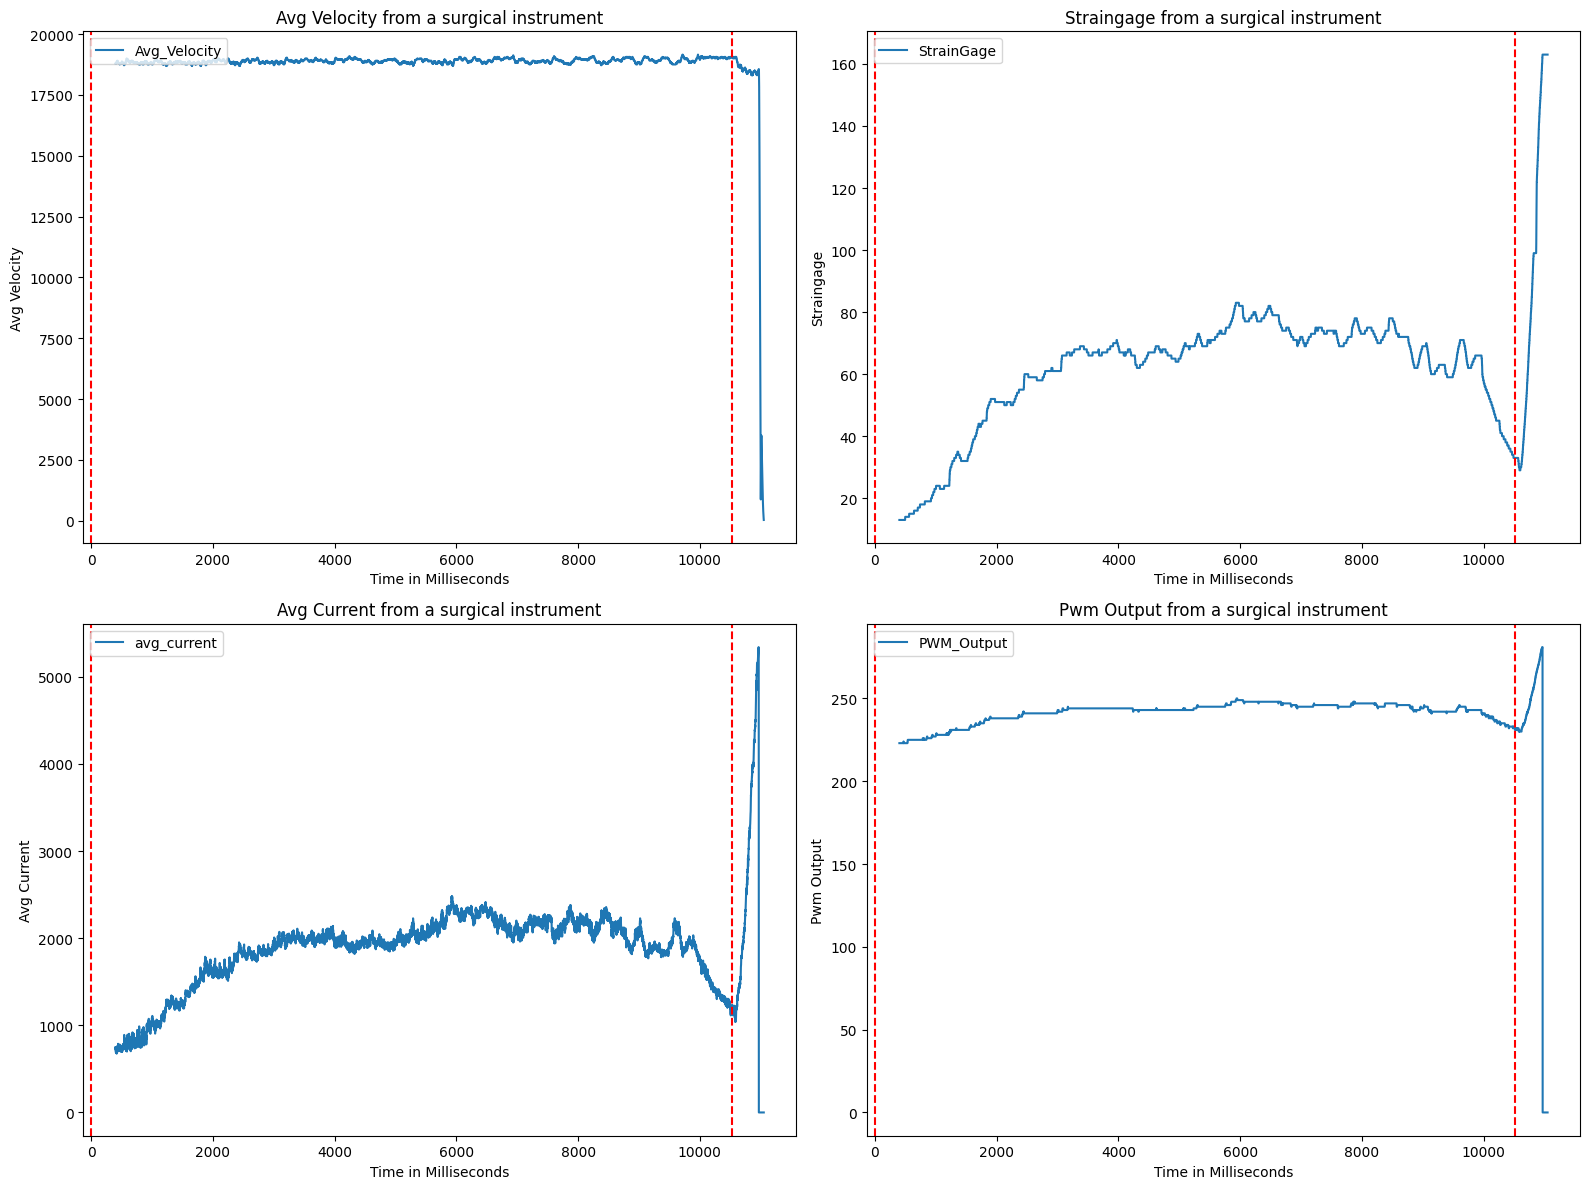

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_measure(padded_df):
    unique_times = np.unique(padded_df['Anomaly_At_Time_ms'])
    df = padded_df[padded_df['Padded_TimeMS'] > 400]

    plt.figure(figsize=(16, 12))

    for i, measure in enumerate(['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output']):
        plt.subplot(2, 2, i+1)
        plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
        plt.xlabel('Time in Milliseconds')
        plt.ylabel(measure.replace('_', ' ').title())
        plt.plot('Padded_TimeMS', measure, data=df)

        # Add vertical lines for each unique Anomaly_At_Time_ms value
        for t in unique_times:
            plt.axvline(t, color='r', linestyle='--')

        plt.legend(loc="upper left")

    plt.tight_layout()
    plt.show()

# Assuming you have the 'padded_df' DataFrame
padded_df_97 = padded_df[padded_df["id"] == 97]
plot_measure(padded_df_97)

In [ ]:
padded_df

,Avg_Velocity,StrainGage,avg_current,PWM_Output,Anomaly_At_Time_ms,Padded_TimeMS,id,Label
0,0,0,0,0,0,0,100,0
1,0,0,0,0,0,0,100,0
2,0,0,0,0,0,0,100,0
3,0,0,0,0,0,0,100,0
4,0,0,0,0,0,0,100,0
...,...,...,...,...,...,...,...,...
10991995,93,163,0,0,10522,11049,97,1
10991996,62,163,0,0,10522,11050,97,1
10991997,62,163,0,0,10522,11050,97,1
10991998,31,163,0,0,10522,11051,97,1


In [ ]:
import numpy as np

# Separate features and labels for training and testing sets
#X = padded_df.drop(['Label', 'id', 'Anomaly_At_Time_ms', 'Padded_TimeMS'], axis=1)
X = padded_df[['Avg_Velocity']]
Y = padded_df[['Label']]

# Convert data to numpy arrays
X_np = X.values
Y_np = Y.values.ravel()

# Separate normal and faulty samples
X_normal = X_np[Y_np == 0]
X_faulty = X_np[Y_np == 1]
Y_normal = Y_np[Y_np == 0]
Y_faulty = Y_np[Y_np == 1]

In [ ]:
# Determine the index to split between training and testing data
split_index = int(0.9 * len(X_normal))  # 80% for training, 20% for testing

# Split the data into training and testing sets
X_train = X_normal[:split_index]
X_test_1 = X_normal[split_index:]
Y_train = Y_normal[:split_index]
Y_test_1 = Y_normal[split_index:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test_1.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test_1.shape)

Shape of X_train: (9765453, 1)
Shape of X_test: (1085051, 1)
Shape of Y_train: (9765453,)
Shape of Y_test: (1085051,)


In [ ]:
# Combine X_test_1 and X_faulty to create a new combined test set
X_test= np.concatenate((X_test_1, X_faulty), axis=0)

# Create corresponding labels for the combined test set
Y_test = np.concatenate((np.zeros(len(X_test_1)), np.ones(len(X_faulty))), axis=0)

print("Shape of X_test_combined:", X_test.shape)
print("Shape of Y_test_combined:", Y_test.shape)

Shape of X_test_combined: (1226547, 1)
Shape of Y_test_combined: (1226547,)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(9765453, 1)
(1226547, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(9765453, 1)
(1226547, 1)


In [ ]:
#from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


n_inputs = 64
n_features = 1
# Create generator for target data (Y_normal)
#target_generator_test = TimeseriesGenerator(Y_faulty, Y_faulty, length=n_inputs, batch_size=1024)

generator_train = TimeseriesGenerator(X_train_scaled, Y_train, length=n_inputs, batch_size=1024)

for i in range(len(generator_train)):
    x_normal, y_normal= generator_train[i]
    print(f'\n {x_normal.flatten()} and {y_normal}')

Streaming output truncated to the last 5000 lines.

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.50302698 -0.50302698 ... -0.50302698 -0.50302698
 -0.50302698] and [0 0 0 ... 0 0 0]

 [-0.50302698 -0.5030

In [ ]:
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator

n_inputs = 64
batch_size = 1024

# Step 1: Separate the normal (0) and anomalous (1) signals
X_normal = X_test_scaled[Y_test == 0]
Y_normal = Y_test[Y_test == 0]

X_anomalous = X_test_scaled[Y_test == 1]
Y_anomalous = Y_test[Y_test == 1]

# Step 2: Create two separate generators for normal and anomalous signals
generator_normal = TimeseriesGenerator(X_normal, Y_normal, length=n_inputs, batch_size=batch_size)
generator_anomalous = TimeseriesGenerator(X_anomalous, Y_anomalous, length=n_inputs, batch_size=batch_size)

# Step 3: Iterate over normal signal batches and ensure no mixed labels
print("Normal Signal Batches:")
mixed_batches_normal = 0
total_batches_normal = len(generator_normal)

for i in range(total_batches_normal):
    x_batch, y_batch = generator_normal[i]
    unique_labels = np.unique(y_batch)

    # Check if this batch contains only normal (0)
    if len(unique_labels) == 1 and unique_labels[0] == 0:
        print(f"Batch {i} contains only normal signals: {unique_labels}")
    else:
        mixed_batches_normal += 1
        print(f"Batch {i} contains mixed signals (which shouldn't happen): {unique_labels}")

print(f"\nTotal number of mixed batches (normal data): {mixed_batches_normal}/{total_batches_normal}")

# Step 4: Iterate over anomalous signal batches and ensure no mixed labels
print("Anomalous Signal Batches:")
mixed_batches_anomalous = 0
total_batches_anomalous = len(generator_anomalous)

for i in range(total_batches_anomalous):
    x_batch, y_batch = generator_anomalous[i]
    unique_labels = np.unique(y_batch)

    # Check if this batch contains only anomalous (1)
    if len(unique_labels) == 1 and unique_labels[0] == 1:
        print(f"Batch {i} contains only anomalous signals: {unique_labels}")
    else:
        mixed_batches_anomalous += 1
        print(f"Batch {i} contains mixed signals (which shouldn't happen): {unique_labels}")

print(f"\nTotal number of mixed batches (anomalous data): {mixed_batches_anomalous}/{total_batches_anomalous}")


Normal Signal Batches:
Batch 0 contains only normal signals: [0.]
Batch 1 contains only normal signals: [0.]
Batch 2 contains only normal signals: [0.]
Batch 3 contains only normal signals: [0.]
Batch 4 contains only normal signals: [0.]
Batch 5 contains only normal signals: [0.]
Batch 6 contains only normal signals: [0.]
Batch 7 contains only normal signals: [0.]
Batch 8 contains only normal signals: [0.]
Batch 9 contains only normal signals: [0.]
Batch 10 contains only normal signals: [0.]
Batch 11 contains only normal signals: [0.]
Batch 12 contains only normal signals: [0.]
Batch 13 contains only normal signals: [0.]
Batch 14 contains only normal signals: [0.]
Batch 15 contains only normal signals: [0.]
Batch 16 contains only normal signals: [0.]
Batch 17 contains only normal signals: [0.]
Batch 18 contains only normal signals: [0.]
Batch 19 contains only normal signals: [0.]
Batch 20 contains only normal signals: [0.]
Batch 21 contains only normal signals: [0.]
Batch 22 contains o

In [ ]:
#Flattening the x
x_normal_r = x_normal.reshape((x_normal.shape[0], -1))

In [ ]:
x_normal_r.shape

(525, 64)

In [ ]:
# Define the Generator model
def get_generator(optimizer):
    # Input layer
    input_layer = Input(shape=(64,))

    # First dense layer
    x = Dense(512, kernel_initializer=initializers.glorot_normal(seed=42))(input_layer)
    x = ReLU()(x)
    x = BatchNormalization()(x)

    # Adding a skip connection (residual connection)
    skip = x  # Skip connection at 512 units

    # Second dense layer (keep the same number of units)
    x = Dense(512)(x)  # Ensure this has the same number of units as the skip connection
    x = ReLU()(x)
    x = BatchNormalization()(x)

    # Add the skip connection to the second layer (both at 512 units)
    x = Add()([x, skip])  # Both tensors have the same shape (512)

    # Third dense layer (reduce the dimensions after the skip connection)
    x = Dense(256)(x)
    x = ReLU()(x)
    x = BatchNormalization()(x)

    # Output layer with tanh activation
    output_layer = Dense(64, activation='tanh')(x)

    # Create the model
    generator = Model(inputs=input_layer, outputs=output_layer)
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return generator

In [ ]:
# Define the Discriminator model
def get_discriminator(optimizer):
    discriminator = Sequential()

    # First dense layer
    discriminator.add(Dense(256, input_dim=64, kernel_initializer=initializers.glorot_normal(seed=42),
                            kernel_regularizer=regularizers.l2(1e-3)))  # Increased L2 Regularization
    discriminator.add(LeakyReLU(alpha=0.2))  # Use LeakyReLU instead of ReLU to avoid dead neurons
    discriminator.add(Dropout(0.4))  # Increased dropout for regularization

    # Second dense layer with fewer neurons
    discriminator.add(Dense(128, kernel_regularizer=regularizers.l2(1e-3)))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(0.4))  # Higher dropout for better regularization

    # Third dense layer
    discriminator.add(Dense(64, kernel_regularizer=regularizers.l2(1e-3)))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(0.4))

    # Output layer for binary classification (real vs fake)
    discriminator.add(Dense(1, activation='sigmoid'))

    # Compile the discriminator with a lower learning rate to prevent overpowering the generator
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [ ]:
# Define the GAN network
def get_gan_network(discriminator, generator, optimizer, input_dim=64):
    discriminator.trainable = False
    gan_input = Input(shape=(input_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

# Hyperparameters
learning_rate_gen = 0.0001  # Generator learning rate
learning_rate_disc = 0.000001  # Further reduced learning rate for discriminator
batch_size = 256
epochs = 1000
adam_gen = tf.keras.optimizers.Adam(learning_rate=learning_rate_gen, beta_1=0.5)
adam_disc = tf.keras.optimizers.Adam(learning_rate=learning_rate_disc, beta_1=0.5)

# Initialize generator, discriminator, and GAN models
input_dim = 64
generator = get_generator(adam_gen)
discriminator = get_discriminator(adam_disc)
gan = get_gan_network(discriminator, generator, adam_gen, input_dim=input_dim)


# Calculate the number of batches based on the batch size
batch_count = x_normal_r.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

100%|██████████| 2000/2000 [02:32<00:00, 13.14it/s]


In [ ]:
# Training Loop
for epoch in range(epochs):
    for index in range(batch_count):
        pbar.update(1)

        # Create a random set of input noise
        noise = np.random.normal(0, 1, size=[batch_size, 64])

        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)

        # Obtain a batch of real samples
        image_batch = x_normal_r[index * batch_size: (index + 1) * batch_size]

        # Stack real and fake samples together
        X = np.vstack((generated_images, image_batch))

        # Labels for real and fake samples
        y_dis = np.ones(2 * batch_size)
        y_dis[:batch_size] = 0

        # Train the discriminator less frequently to allow the generator to improve
        if epoch % 2 == 0:
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)

        # Train the generator (via the GAN model)
        noise = np.random.uniform(0, 1, size=[batch_size, 64])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

        # Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)

    print(f"Epoch {epoch+1}/{epochs}, Batch {index+1}/{batch_count}, [D loss: {d_loss}] [G loss: {g_loss}]")


  1%|          | 13/2000 [00:10<12:45,  2.60it/s]

Epoch 1/1000, Batch 2/2, [D loss: 1.2011761665344238] [G loss: 1.604262351989746]
Epoch 2/1000, Batch 2/2, [D loss: 1.2011761665344238] [G loss: 1.5324152708053589]
Epoch 3/1000, Batch 2/2, [D loss: 1.1683220863342285] [G loss: 1.517374038696289]
Epoch 4/1000, Batch 2/2, [D loss: 1.1683220863342285] [G loss: 1.5449614524841309]
Epoch 5/1000, Batch 2/2, [D loss: 1.2008875608444214] [G loss: 1.5625317096710205]
Epoch 6/1000, Batch 2/2, [D loss: 1.2008875608444214] [G loss: 1.5164897441864014]


  1%|          | 24/2000 [00:10<04:49,  6.82it/s]

Epoch 7/1000, Batch 2/2, [D loss: 1.2100580930709839] [G loss: 1.5130635499954224]
Epoch 8/1000, Batch 2/2, [D loss: 1.2100580930709839] [G loss: 1.5092687606811523]
Epoch 9/1000, Batch 2/2, [D loss: 1.1802520751953125] [G loss: 1.5003935098648071]
Epoch 10/1000, Batch 2/2, [D loss: 1.1802520751953125] [G loss: 1.5494474172592163]
Epoch 11/1000, Batch 2/2, [D loss: 1.178877353668213] [G loss: 1.5236622095108032]
Epoch 12/1000, Batch 2/2, [D loss: 1.178877353668213] [G loss: 1.5000882148742676]


  2%|▏         | 35/2000 [00:10<02:27, 13.31it/s]

Epoch 13/1000, Batch 2/2, [D loss: 1.212969183921814] [G loss: 1.53407621383667]
Epoch 14/1000, Batch 2/2, [D loss: 1.212969183921814] [G loss: 1.5171964168548584]
Epoch 15/1000, Batch 2/2, [D loss: 1.1784093379974365] [G loss: 1.451694369316101]
Epoch 16/1000, Batch 2/2, [D loss: 1.1784093379974365] [G loss: 1.4469188451766968]
Epoch 17/1000, Batch 2/2, [D loss: 1.1966919898986816] [G loss: 1.4940979480743408]
Epoch 18/1000, Batch 2/2, [D loss: 1.1966919898986816] [G loss: 1.4471572637557983]


  2%|▏         | 47/2000 [00:10<01:25, 22.81it/s]

Epoch 19/1000, Batch 2/2, [D loss: 1.1789348125457764] [G loss: 1.4792238473892212]
Epoch 20/1000, Batch 2/2, [D loss: 1.1789348125457764] [G loss: 1.4890950918197632]
Epoch 21/1000, Batch 2/2, [D loss: 1.1043360233306885] [G loss: 1.4787499904632568]
Epoch 22/1000, Batch 2/2, [D loss: 1.1043360233306885] [G loss: 1.5021185874938965]
Epoch 23/1000, Batch 2/2, [D loss: 1.1849026679992676] [G loss: 1.4741603136062622]
Epoch 24/1000, Batch 2/2, [D loss: 1.1849026679992676] [G loss: 1.4492900371551514]


  3%|▎         | 59/2000 [00:10<00:59, 32.60it/s]

Epoch 25/1000, Batch 2/2, [D loss: 1.1866719722747803] [G loss: 1.492240309715271]
Epoch 26/1000, Batch 2/2, [D loss: 1.1866719722747803] [G loss: 1.4579851627349854]
Epoch 27/1000, Batch 2/2, [D loss: 1.1336034536361694] [G loss: 1.4612953662872314]
Epoch 28/1000, Batch 2/2, [D loss: 1.1336034536361694] [G loss: 1.452549934387207]
Epoch 29/1000, Batch 2/2, [D loss: 1.1097354888916016] [G loss: 1.4687401056289673]
Epoch 30/1000, Batch 2/2, [D loss: 1.1097354888916016] [G loss: 1.4332706928253174]


  4%|▎         | 71/2000 [00:11<00:48, 40.17it/s]

Epoch 31/1000, Batch 2/2, [D loss: 1.1994794607162476] [G loss: 1.4411842823028564]
Epoch 32/1000, Batch 2/2, [D loss: 1.1994794607162476] [G loss: 1.4422252178192139]
Epoch 33/1000, Batch 2/2, [D loss: 1.1912161111831665] [G loss: 1.4378705024719238]
Epoch 34/1000, Batch 2/2, [D loss: 1.1912161111831665] [G loss: 1.403749704360962]
Epoch 35/1000, Batch 2/2, [D loss: 1.1924920082092285] [G loss: 1.4550451040267944]
Epoch 36/1000, Batch 2/2, [D loss: 1.1924920082092285] [G loss: 1.4008904695510864]


  4%|▍         | 83/2000 [00:11<00:42, 45.06it/s]

Epoch 37/1000, Batch 2/2, [D loss: 1.149560570716858] [G loss: 1.4154136180877686]
Epoch 38/1000, Batch 2/2, [D loss: 1.149560570716858] [G loss: 1.4528828859329224]
Epoch 39/1000, Batch 2/2, [D loss: 1.1592870950698853] [G loss: 1.4013373851776123]
Epoch 40/1000, Batch 2/2, [D loss: 1.1592870950698853] [G loss: 1.415475606918335]
Epoch 41/1000, Batch 2/2, [D loss: 1.1264309883117676] [G loss: 1.4248743057250977]
Epoch 42/1000, Batch 2/2, [D loss: 1.1264309883117676] [G loss: 1.4248099327087402]


  5%|▍         | 95/2000 [00:11<00:39, 48.01it/s]

Epoch 43/1000, Batch 2/2, [D loss: 1.1700490713119507] [G loss: 1.379955768585205]
Epoch 44/1000, Batch 2/2, [D loss: 1.1700490713119507] [G loss: 1.4380567073822021]
Epoch 45/1000, Batch 2/2, [D loss: 1.1648234128952026] [G loss: 1.3985682725906372]
Epoch 46/1000, Batch 2/2, [D loss: 1.1648234128952026] [G loss: 1.4286818504333496]
Epoch 47/1000, Batch 2/2, [D loss: 1.1504886150360107] [G loss: 1.399542212486267]
Epoch 48/1000, Batch 2/2, [D loss: 1.1504886150360107] [G loss: 1.3893338441848755]


  5%|▌         | 107/2000 [00:11<00:38, 49.68it/s]

Epoch 49/1000, Batch 2/2, [D loss: 1.1636587381362915] [G loss: 1.4150254726409912]
Epoch 50/1000, Batch 2/2, [D loss: 1.1636587381362915] [G loss: 1.385340690612793]
Epoch 51/1000, Batch 2/2, [D loss: 1.11689031124115] [G loss: 1.3716228008270264]
Epoch 52/1000, Batch 2/2, [D loss: 1.11689031124115] [G loss: 1.3846962451934814]
Epoch 53/1000, Batch 2/2, [D loss: 1.1716194152832031] [G loss: 1.3939703702926636]
Epoch 54/1000, Batch 2/2, [D loss: 1.1716194152832031] [G loss: 1.4238554239273071]


  6%|▌         | 119/2000 [00:12<00:37, 50.24it/s]

Epoch 55/1000, Batch 2/2, [D loss: 1.1312004327774048] [G loss: 1.3977010250091553]
Epoch 56/1000, Batch 2/2, [D loss: 1.1312004327774048] [G loss: 1.3842718601226807]
Epoch 57/1000, Batch 2/2, [D loss: 1.1466779708862305] [G loss: 1.3838424682617188]
Epoch 58/1000, Batch 2/2, [D loss: 1.1466779708862305] [G loss: 1.3855339288711548]
Epoch 59/1000, Batch 2/2, [D loss: 1.1574506759643555] [G loss: 1.369661808013916]
Epoch 60/1000, Batch 2/2, [D loss: 1.1574506759643555] [G loss: 1.3731653690338135]


  7%|▋         | 131/2000 [00:12<00:36, 51.02it/s]

Epoch 61/1000, Batch 2/2, [D loss: 1.109940767288208] [G loss: 1.4055805206298828]
Epoch 62/1000, Batch 2/2, [D loss: 1.109940767288208] [G loss: 1.3721649646759033]
Epoch 63/1000, Batch 2/2, [D loss: 1.1475200653076172] [G loss: 1.3894293308258057]
Epoch 64/1000, Batch 2/2, [D loss: 1.1475200653076172] [G loss: 1.3824682235717773]
Epoch 65/1000, Batch 2/2, [D loss: 1.1383121013641357] [G loss: 1.3565442562103271]
Epoch 66/1000, Batch 2/2, [D loss: 1.1383121013641357] [G loss: 1.3486055135726929]


  7%|▋         | 143/2000 [00:12<00:36, 51.44it/s]

Epoch 67/1000, Batch 2/2, [D loss: 1.1314501762390137] [G loss: 1.3463099002838135]
Epoch 68/1000, Batch 2/2, [D loss: 1.1314501762390137] [G loss: 1.360748052597046]
Epoch 69/1000, Batch 2/2, [D loss: 1.1812317371368408] [G loss: 1.3325848579406738]
Epoch 70/1000, Batch 2/2, [D loss: 1.1812317371368408] [G loss: 1.3655760288238525]
Epoch 71/1000, Batch 2/2, [D loss: 1.1478708982467651] [G loss: 1.3492393493652344]
Epoch 72/1000, Batch 2/2, [D loss: 1.1478708982467651] [G loss: 1.354762077331543]


  8%|▊         | 155/2000 [00:12<00:35, 51.95it/s]

Epoch 73/1000, Batch 2/2, [D loss: 1.1413700580596924] [G loss: 1.3860223293304443]
Epoch 74/1000, Batch 2/2, [D loss: 1.1413700580596924] [G loss: 1.3390358686447144]
Epoch 75/1000, Batch 2/2, [D loss: 1.1511107683181763] [G loss: 1.360743522644043]
Epoch 76/1000, Batch 2/2, [D loss: 1.1511107683181763] [G loss: 1.3300175666809082]
Epoch 77/1000, Batch 2/2, [D loss: 1.096266508102417] [G loss: 1.2803400754928589]
Epoch 78/1000, Batch 2/2, [D loss: 1.096266508102417] [G loss: 1.3581414222717285]


  8%|▊         | 167/2000 [00:13<00:35, 51.71it/s]

Epoch 79/1000, Batch 2/2, [D loss: 1.1149437427520752] [G loss: 1.3239214420318604]
Epoch 80/1000, Batch 2/2, [D loss: 1.1149437427520752] [G loss: 1.3538777828216553]
Epoch 81/1000, Batch 2/2, [D loss: 1.1512418985366821] [G loss: 1.3414887189865112]
Epoch 82/1000, Batch 2/2, [D loss: 1.1512418985366821] [G loss: 1.3302478790283203]
Epoch 83/1000, Batch 2/2, [D loss: 1.1470314264297485] [G loss: 1.3366405963897705]
Epoch 84/1000, Batch 2/2, [D loss: 1.1470314264297485] [G loss: 1.2996554374694824]


  9%|▉         | 179/2000 [00:13<00:35, 51.97it/s]

Epoch 85/1000, Batch 2/2, [D loss: 1.1073622703552246] [G loss: 1.3558862209320068]
Epoch 86/1000, Batch 2/2, [D loss: 1.1073622703552246] [G loss: 1.3735570907592773]
Epoch 87/1000, Batch 2/2, [D loss: 1.1378164291381836] [G loss: 1.348767876625061]
Epoch 88/1000, Batch 2/2, [D loss: 1.1378164291381836] [G loss: 1.335075855255127]
Epoch 89/1000, Batch 2/2, [D loss: 1.0974146127700806] [G loss: 1.340920329093933]
Epoch 90/1000, Batch 2/2, [D loss: 1.0974146127700806] [G loss: 1.3265272378921509]


 10%|▉         | 191/2000 [00:13<00:34, 52.32it/s]

Epoch 91/1000, Batch 2/2, [D loss: 1.1344313621520996] [G loss: 1.3171839714050293]
Epoch 92/1000, Batch 2/2, [D loss: 1.1344313621520996] [G loss: 1.2970221042633057]
Epoch 93/1000, Batch 2/2, [D loss: 1.1058952808380127] [G loss: 1.336082100868225]
Epoch 94/1000, Batch 2/2, [D loss: 1.1058952808380127] [G loss: 1.3238862752914429]
Epoch 95/1000, Batch 2/2, [D loss: 1.1485137939453125] [G loss: 1.3199429512023926]
Epoch 96/1000, Batch 2/2, [D loss: 1.1485137939453125] [G loss: 1.30870521068573]


 10%|█         | 203/2000 [00:13<00:34, 52.18it/s]

Epoch 97/1000, Batch 2/2, [D loss: 1.089324712753296] [G loss: 1.2876850366592407]
Epoch 98/1000, Batch 2/2, [D loss: 1.089324712753296] [G loss: 1.3265364170074463]
Epoch 99/1000, Batch 2/2, [D loss: 1.123724102973938] [G loss: 1.3351808786392212]
Epoch 100/1000, Batch 2/2, [D loss: 1.123724102973938] [G loss: 1.2784820795059204]
Epoch 101/1000, Batch 2/2, [D loss: 1.1011803150177002] [G loss: 1.3191566467285156]
Epoch 102/1000, Batch 2/2, [D loss: 1.1011803150177002] [G loss: 1.3188822269439697]


 11%|█         | 215/2000 [00:13<00:34, 52.36it/s]

Epoch 103/1000, Batch 2/2, [D loss: 1.0974215269088745] [G loss: 1.2756990194320679]
Epoch 104/1000, Batch 2/2, [D loss: 1.0974215269088745] [G loss: 1.3079501390457153]
Epoch 105/1000, Batch 2/2, [D loss: 1.168302059173584] [G loss: 1.2886195182800293]
Epoch 106/1000, Batch 2/2, [D loss: 1.168302059173584] [G loss: 1.3204131126403809]
Epoch 107/1000, Batch 2/2, [D loss: 1.0885274410247803] [G loss: 1.3183960914611816]
Epoch 108/1000, Batch 2/2, [D loss: 1.0885274410247803] [G loss: 1.2845706939697266]


 11%|█▏        | 227/2000 [00:14<00:33, 52.31it/s]

Epoch 109/1000, Batch 2/2, [D loss: 1.1102848052978516] [G loss: 1.3414814472198486]
Epoch 110/1000, Batch 2/2, [D loss: 1.1102848052978516] [G loss: 1.2491812705993652]
Epoch 111/1000, Batch 2/2, [D loss: 1.0911977291107178] [G loss: 1.320810079574585]
Epoch 112/1000, Batch 2/2, [D loss: 1.0911977291107178] [G loss: 1.2868661880493164]
Epoch 113/1000, Batch 2/2, [D loss: 1.103550910949707] [G loss: 1.300107479095459]
Epoch 114/1000, Batch 2/2, [D loss: 1.103550910949707] [G loss: 1.2939951419830322]


 12%|█▏        | 239/2000 [00:14<00:33, 52.25it/s]

Epoch 115/1000, Batch 2/2, [D loss: 1.1161210536956787] [G loss: 1.3229272365570068]
Epoch 116/1000, Batch 2/2, [D loss: 1.1161210536956787] [G loss: 1.2862240076065063]
Epoch 117/1000, Batch 2/2, [D loss: 1.113566517829895] [G loss: 1.2847691774368286]
Epoch 118/1000, Batch 2/2, [D loss: 1.113566517829895] [G loss: 1.2776403427124023]
Epoch 119/1000, Batch 2/2, [D loss: 1.0910375118255615] [G loss: 1.3242549896240234]
Epoch 120/1000, Batch 2/2, [D loss: 1.0910375118255615] [G loss: 1.2643332481384277]


 13%|█▎        | 251/2000 [00:14<00:33, 51.85it/s]

Epoch 121/1000, Batch 2/2, [D loss: 1.1271429061889648] [G loss: 1.244970679283142]
Epoch 122/1000, Batch 2/2, [D loss: 1.1271429061889648] [G loss: 1.294771432876587]
Epoch 123/1000, Batch 2/2, [D loss: 1.1330164670944214] [G loss: 1.2274587154388428]
Epoch 124/1000, Batch 2/2, [D loss: 1.1330164670944214] [G loss: 1.2607133388519287]
Epoch 125/1000, Batch 2/2, [D loss: 1.116823434829712] [G loss: 1.2618234157562256]
Epoch 126/1000, Batch 2/2, [D loss: 1.116823434829712] [G loss: 1.2905761003494263]


 13%|█▎        | 263/2000 [00:14<00:33, 51.88it/s]

Epoch 127/1000, Batch 2/2, [D loss: 1.1195590496063232] [G loss: 1.2796800136566162]
Epoch 128/1000, Batch 2/2, [D loss: 1.1195590496063232] [G loss: 1.2908331155776978]
Epoch 129/1000, Batch 2/2, [D loss: 1.1098496913909912] [G loss: 1.2628940343856812]
Epoch 130/1000, Batch 2/2, [D loss: 1.1098496913909912] [G loss: 1.2627092599868774]
Epoch 131/1000, Batch 2/2, [D loss: 1.1002475023269653] [G loss: 1.2640743255615234]
Epoch 132/1000, Batch 2/2, [D loss: 1.1002475023269653] [G loss: 1.2434152364730835]


 14%|█▍        | 275/2000 [00:15<00:33, 52.26it/s]

Epoch 133/1000, Batch 2/2, [D loss: 1.131631851196289] [G loss: 1.2585430145263672]
Epoch 134/1000, Batch 2/2, [D loss: 1.131631851196289] [G loss: 1.295482873916626]
Epoch 135/1000, Batch 2/2, [D loss: 1.0716521739959717] [G loss: 1.27492356300354]
Epoch 136/1000, Batch 2/2, [D loss: 1.0716521739959717] [G loss: 1.263904333114624]
Epoch 137/1000, Batch 2/2, [D loss: 1.1068387031555176] [G loss: 1.2629902362823486]
Epoch 138/1000, Batch 2/2, [D loss: 1.1068387031555176] [G loss: 1.2563835382461548]


 14%|█▍        | 287/2000 [00:15<00:32, 52.85it/s]

Epoch 139/1000, Batch 2/2, [D loss: 1.0849872827529907] [G loss: 1.2468883991241455]
Epoch 140/1000, Batch 2/2, [D loss: 1.0849872827529907] [G loss: 1.2538729906082153]
Epoch 141/1000, Batch 2/2, [D loss: 1.11698317527771] [G loss: 1.3223519325256348]
Epoch 142/1000, Batch 2/2, [D loss: 1.11698317527771] [G loss: 1.24773371219635]
Epoch 143/1000, Batch 2/2, [D loss: 1.0989031791687012] [G loss: 1.2363030910491943]
Epoch 144/1000, Batch 2/2, [D loss: 1.0989031791687012] [G loss: 1.2393348217010498]


 15%|█▍        | 299/2000 [00:15<00:32, 52.01it/s]

Epoch 145/1000, Batch 2/2, [D loss: 1.0962998867034912] [G loss: 1.2629066705703735]
Epoch 146/1000, Batch 2/2, [D loss: 1.0962998867034912] [G loss: 1.2404743432998657]
Epoch 147/1000, Batch 2/2, [D loss: 1.075048804283142] [G loss: 1.233778953552246]
Epoch 148/1000, Batch 2/2, [D loss: 1.075048804283142] [G loss: 1.2533164024353027]
Epoch 149/1000, Batch 2/2, [D loss: 1.066633701324463] [G loss: 1.2728558778762817]
Epoch 150/1000, Batch 2/2, [D loss: 1.066633701324463] [G loss: 1.2612643241882324]


 16%|█▌        | 311/2000 [00:15<00:32, 52.69it/s]

Epoch 151/1000, Batch 2/2, [D loss: 1.0984569787979126] [G loss: 1.2552398443222046]
Epoch 152/1000, Batch 2/2, [D loss: 1.0984569787979126] [G loss: 1.232617735862732]
Epoch 153/1000, Batch 2/2, [D loss: 1.0956461429595947] [G loss: 1.2206319570541382]
Epoch 154/1000, Batch 2/2, [D loss: 1.0956461429595947] [G loss: 1.267203450202942]
Epoch 155/1000, Batch 2/2, [D loss: 1.0554146766662598] [G loss: 1.2193597555160522]
Epoch 156/1000, Batch 2/2, [D loss: 1.0554146766662598] [G loss: 1.2393702268600464]


 16%|█▌        | 323/2000 [00:15<00:32, 52.33it/s]

Epoch 157/1000, Batch 2/2, [D loss: 1.113959550857544] [G loss: 1.220402717590332]
Epoch 158/1000, Batch 2/2, [D loss: 1.113959550857544] [G loss: 1.2356334924697876]
Epoch 159/1000, Batch 2/2, [D loss: 1.0850820541381836] [G loss: 1.2632055282592773]
Epoch 160/1000, Batch 2/2, [D loss: 1.0850820541381836] [G loss: 1.2588143348693848]
Epoch 161/1000, Batch 2/2, [D loss: 1.0869964361190796] [G loss: 1.254191279411316]
Epoch 162/1000, Batch 2/2, [D loss: 1.0869964361190796] [G loss: 1.2242562770843506]


 17%|█▋        | 335/2000 [00:16<00:31, 52.10it/s]

Epoch 163/1000, Batch 2/2, [D loss: 1.0926494598388672] [G loss: 1.2601633071899414]
Epoch 164/1000, Batch 2/2, [D loss: 1.0926494598388672] [G loss: 1.2489054203033447]
Epoch 165/1000, Batch 2/2, [D loss: 1.1128005981445312] [G loss: 1.266087532043457]
Epoch 166/1000, Batch 2/2, [D loss: 1.1128005981445312] [G loss: 1.227618932723999]
Epoch 167/1000, Batch 2/2, [D loss: 1.095306396484375] [G loss: 1.2489628791809082]
Epoch 168/1000, Batch 2/2, [D loss: 1.095306396484375] [G loss: 1.23198664188385]


 17%|█▋        | 347/2000 [00:16<00:32, 51.38it/s]

Epoch 169/1000, Batch 2/2, [D loss: 1.0826036930084229] [G loss: 1.2508111000061035]
Epoch 170/1000, Batch 2/2, [D loss: 1.0826036930084229] [G loss: 1.2453303337097168]
Epoch 171/1000, Batch 2/2, [D loss: 1.0703545808792114] [G loss: 1.2173268795013428]
Epoch 172/1000, Batch 2/2, [D loss: 1.0703545808792114] [G loss: 1.2217382192611694]
Epoch 173/1000, Batch 2/2, [D loss: 1.1080243587493896] [G loss: 1.2400670051574707]
Epoch 174/1000, Batch 2/2, [D loss: 1.1080243587493896] [G loss: 1.2149600982666016]


 18%|█▊        | 359/2000 [00:16<00:33, 49.68it/s]

Epoch 175/1000, Batch 2/2, [D loss: 1.08048415184021] [G loss: 1.226933479309082]
Epoch 176/1000, Batch 2/2, [D loss: 1.08048415184021] [G loss: 1.2066059112548828]
Epoch 177/1000, Batch 2/2, [D loss: 1.1136424541473389] [G loss: 1.2239700555801392]
Epoch 178/1000, Batch 2/2, [D loss: 1.1136424541473389] [G loss: 1.2373136281967163]
Epoch 179/1000, Batch 2/2, [D loss: 1.0635251998901367] [G loss: 1.2213963270187378]
Epoch 180/1000, Batch 2/2, [D loss: 1.0635251998901367] [G loss: 1.2328182458877563]


 19%|█▊        | 371/2000 [00:16<00:33, 49.33it/s]

Epoch 181/1000, Batch 2/2, [D loss: 1.0647189617156982] [G loss: 1.2079119682312012]
Epoch 182/1000, Batch 2/2, [D loss: 1.0647189617156982] [G loss: 1.2120968103408813]
Epoch 183/1000, Batch 2/2, [D loss: 1.0787581205368042] [G loss: 1.2240549325942993]
Epoch 184/1000, Batch 2/2, [D loss: 1.0787581205368042] [G loss: 1.2014625072479248]
Epoch 185/1000, Batch 2/2, [D loss: 1.049469232559204] [G loss: 1.2003962993621826]
Epoch 186/1000, Batch 2/2, [D loss: 1.049469232559204] [G loss: 1.2321631908416748]


 19%|█▉        | 383/2000 [00:17<00:32, 49.33it/s]

Epoch 187/1000, Batch 2/2, [D loss: 1.075900673866272] [G loss: 1.2307546138763428]
Epoch 188/1000, Batch 2/2, [D loss: 1.075900673866272] [G loss: 1.1953730583190918]
Epoch 189/1000, Batch 2/2, [D loss: 1.0508105754852295] [G loss: 1.209118366241455]
Epoch 190/1000, Batch 2/2, [D loss: 1.0508105754852295] [G loss: 1.2105827331542969]
Epoch 191/1000, Batch 2/2, [D loss: 1.0885651111602783] [G loss: 1.1853022575378418]
Epoch 192/1000, Batch 2/2, [D loss: 1.0885651111602783] [G loss: 1.2014167308807373]


 20%|█▉        | 394/2000 [00:17<00:32, 49.47it/s]

Epoch 193/1000, Batch 2/2, [D loss: 1.0805543661117554] [G loss: 1.2097934484481812]
Epoch 194/1000, Batch 2/2, [D loss: 1.0805543661117554] [G loss: 1.1864733695983887]
Epoch 195/1000, Batch 2/2, [D loss: 1.0733637809753418] [G loss: 1.2176340818405151]
Epoch 196/1000, Batch 2/2, [D loss: 1.0733637809753418] [G loss: 1.193106770515442]
Epoch 197/1000, Batch 2/2, [D loss: 1.0711259841918945] [G loss: 1.1776354312896729]
Epoch 198/1000, Batch 2/2, [D loss: 1.0711259841918945] [G loss: 1.2027705907821655]


 20%|██        | 405/2000 [00:17<00:31, 50.15it/s]

Epoch 199/1000, Batch 2/2, [D loss: 1.0874238014221191] [G loss: 1.193310260772705]
Epoch 200/1000, Batch 2/2, [D loss: 1.0874238014221191] [G loss: 1.202460765838623]
Epoch 201/1000, Batch 2/2, [D loss: 1.041835069656372] [G loss: 1.2129255533218384]
Epoch 202/1000, Batch 2/2, [D loss: 1.041835069656372] [G loss: 1.19426691532135]
Epoch 203/1000, Batch 2/2, [D loss: 1.1115491390228271] [G loss: 1.1999537944793701]
Epoch 204/1000, Batch 2/2, [D loss: 1.1115491390228271] [G loss: 1.1827709674835205]


 21%|██        | 416/2000 [00:17<00:32, 48.16it/s]

Epoch 205/1000, Batch 2/2, [D loss: 1.0769851207733154] [G loss: 1.191009283065796]
Epoch 206/1000, Batch 2/2, [D loss: 1.0769851207733154] [G loss: 1.224722981452942]
Epoch 207/1000, Batch 2/2, [D loss: 1.0759433507919312] [G loss: 1.1930584907531738]
Epoch 208/1000, Batch 2/2, [D loss: 1.0759433507919312] [G loss: 1.2006598711013794]
Epoch 209/1000, Batch 2/2, [D loss: 1.0742518901824951] [G loss: 1.1740550994873047]


 21%|██▏       | 426/2000 [00:18<00:33, 47.53it/s]

Epoch 210/1000, Batch 2/2, [D loss: 1.0742518901824951] [G loss: 1.2032718658447266]
Epoch 211/1000, Batch 2/2, [D loss: 1.0844980478286743] [G loss: 1.1832393407821655]
Epoch 212/1000, Batch 2/2, [D loss: 1.0844980478286743] [G loss: 1.1779693365097046]
Epoch 213/1000, Batch 2/2, [D loss: 1.0528558492660522] [G loss: 1.162717342376709]
Epoch 214/1000, Batch 2/2, [D loss: 1.0528558492660522] [G loss: 1.2004646062850952]


 22%|██▏       | 436/2000 [00:18<00:32, 47.78it/s]

Epoch 215/1000, Batch 2/2, [D loss: 1.068596363067627] [G loss: 1.1956650018692017]
Epoch 216/1000, Batch 2/2, [D loss: 1.068596363067627] [G loss: 1.207571268081665]
Epoch 217/1000, Batch 2/2, [D loss: 1.0586910247802734] [G loss: 1.1838748455047607]
Epoch 218/1000, Batch 2/2, [D loss: 1.0586910247802734] [G loss: 1.1964296102523804]
Epoch 219/1000, Batch 2/2, [D loss: 1.0799648761749268] [G loss: 1.1486088037490845]


 22%|██▏       | 446/2000 [00:18<00:32, 47.40it/s]

Epoch 220/1000, Batch 2/2, [D loss: 1.0799648761749268] [G loss: 1.1833548545837402]
Epoch 221/1000, Batch 2/2, [D loss: 1.0542256832122803] [G loss: 1.1845829486846924]
Epoch 222/1000, Batch 2/2, [D loss: 1.0542256832122803] [G loss: 1.1449192762374878]
Epoch 223/1000, Batch 2/2, [D loss: 1.0856605768203735] [G loss: 1.1868544816970825]
Epoch 224/1000, Batch 2/2, [D loss: 1.0856605768203735] [G loss: 1.1720798015594482]


 23%|██▎       | 457/2000 [00:18<00:31, 48.36it/s]

Epoch 225/1000, Batch 2/2, [D loss: 1.0548185110092163] [G loss: 1.1781692504882812]
Epoch 226/1000, Batch 2/2, [D loss: 1.0548185110092163] [G loss: 1.175603985786438]
Epoch 227/1000, Batch 2/2, [D loss: 1.1034737825393677] [G loss: 1.1608688831329346]
Epoch 228/1000, Batch 2/2, [D loss: 1.1034737825393677] [G loss: 1.1630182266235352]
Epoch 229/1000, Batch 2/2, [D loss: 1.05271577835083] [G loss: 1.1724157333374023]
Epoch 230/1000, Batch 2/2, [D loss: 1.05271577835083] [G loss: 1.170820951461792]


 24%|██▎       | 473/2000 [00:19<00:30, 49.88it/s]

Epoch 231/1000, Batch 2/2, [D loss: 1.0710461139678955] [G loss: 1.1838700771331787]
Epoch 232/1000, Batch 2/2, [D loss: 1.0710461139678955] [G loss: 1.1826601028442383]
Epoch 233/1000, Batch 2/2, [D loss: 1.0668281316757202] [G loss: 1.1775617599487305]
Epoch 234/1000, Batch 2/2, [D loss: 1.0668281316757202] [G loss: 1.1829835176467896]
Epoch 235/1000, Batch 2/2, [D loss: 1.0681648254394531] [G loss: 1.1829148530960083]
Epoch 236/1000, Batch 2/2, [D loss: 1.0681648254394531] [G loss: 1.1719655990600586]


 24%|██▍       | 483/2000 [00:19<00:30, 49.22it/s]

Epoch 237/1000, Batch 2/2, [D loss: 1.0527079105377197] [G loss: 1.1686584949493408]
Epoch 238/1000, Batch 2/2, [D loss: 1.0527079105377197] [G loss: 1.1939404010772705]
Epoch 239/1000, Batch 2/2, [D loss: 1.0589773654937744] [G loss: 1.1395771503448486]
Epoch 240/1000, Batch 2/2, [D loss: 1.0589773654937744] [G loss: 1.1587153673171997]
Epoch 241/1000, Batch 2/2, [D loss: 1.0511704683303833] [G loss: 1.143496036529541]
Epoch 242/1000, Batch 2/2, [D loss: 1.0511704683303833] [G loss: 1.1461306810379028]


 25%|██▍       | 494/2000 [00:19<00:30, 50.17it/s]

Epoch 243/1000, Batch 2/2, [D loss: 1.057816505432129] [G loss: 1.149369239807129]
Epoch 244/1000, Batch 2/2, [D loss: 1.057816505432129] [G loss: 1.1933940649032593]
Epoch 245/1000, Batch 2/2, [D loss: 1.0867133140563965] [G loss: 1.1969573497772217]
Epoch 246/1000, Batch 2/2, [D loss: 1.0867133140563965] [G loss: 1.1614952087402344]
Epoch 247/1000, Batch 2/2, [D loss: 1.0284626483917236] [G loss: 1.1326311826705933]
Epoch 248/1000, Batch 2/2, [D loss: 1.0284626483917236] [G loss: 1.1650996208190918]


 25%|██▌       | 506/2000 [00:19<00:29, 50.08it/s]

Epoch 249/1000, Batch 2/2, [D loss: 0.9968622922897339] [G loss: 1.1426045894622803]
Epoch 250/1000, Batch 2/2, [D loss: 0.9968622922897339] [G loss: 1.1515231132507324]
Epoch 251/1000, Batch 2/2, [D loss: 1.0492619276046753] [G loss: 1.1625704765319824]
Epoch 252/1000, Batch 2/2, [D loss: 1.0492619276046753] [G loss: 1.163136601448059]
Epoch 253/1000, Batch 2/2, [D loss: 0.989854633808136] [G loss: 1.163973331451416]
Epoch 254/1000, Batch 2/2, [D loss: 0.989854633808136] [G loss: 1.1618365049362183]


 26%|██▌       | 518/2000 [00:19<00:30, 49.34it/s]

Epoch 255/1000, Batch 2/2, [D loss: 1.0584372282028198] [G loss: 1.142486572265625]
Epoch 256/1000, Batch 2/2, [D loss: 1.0584372282028198] [G loss: 1.1412405967712402]
Epoch 257/1000, Batch 2/2, [D loss: 1.0382778644561768] [G loss: 1.1678401231765747]
Epoch 258/1000, Batch 2/2, [D loss: 1.0382778644561768] [G loss: 1.149420976638794]
Epoch 259/1000, Batch 2/2, [D loss: 1.060990810394287] [G loss: 1.1599905490875244]
Epoch 260/1000, Batch 2/2, [D loss: 1.060990810394287] [G loss: 1.1311434507369995]


 26%|██▋       | 529/2000 [00:20<00:29, 50.31it/s]

Epoch 261/1000, Batch 2/2, [D loss: 1.0786314010620117] [G loss: 1.1583188772201538]
Epoch 262/1000, Batch 2/2, [D loss: 1.0786314010620117] [G loss: 1.2022490501403809]
Epoch 263/1000, Batch 2/2, [D loss: 1.0361227989196777] [G loss: 1.1076710224151611]
Epoch 264/1000, Batch 2/2, [D loss: 1.0361227989196777] [G loss: 1.128150463104248]
Epoch 265/1000, Batch 2/2, [D loss: 1.0250349044799805] [G loss: 1.1343365907669067]
Epoch 266/1000, Batch 2/2, [D loss: 1.0250349044799805] [G loss: 1.1558561325073242]


 27%|██▋       | 541/2000 [00:20<00:28, 52.00it/s]

Epoch 267/1000, Batch 2/2, [D loss: 1.0010473728179932] [G loss: 1.141061544418335]
Epoch 268/1000, Batch 2/2, [D loss: 1.0010473728179932] [G loss: 1.1531654596328735]
Epoch 269/1000, Batch 2/2, [D loss: 1.027454137802124] [G loss: 1.1524337530136108]
Epoch 270/1000, Batch 2/2, [D loss: 1.027454137802124] [G loss: 1.1451585292816162]
Epoch 271/1000, Batch 2/2, [D loss: 1.032120943069458] [G loss: 1.1547057628631592]
Epoch 272/1000, Batch 2/2, [D loss: 1.032120943069458] [G loss: 1.1383039951324463]


 28%|██▊       | 553/2000 [00:20<00:27, 52.12it/s]

Epoch 273/1000, Batch 2/2, [D loss: 1.0686691999435425] [G loss: 1.1475703716278076]
Epoch 274/1000, Batch 2/2, [D loss: 1.0686691999435425] [G loss: 1.1423403024673462]
Epoch 275/1000, Batch 2/2, [D loss: 1.005256175994873] [G loss: 1.1349408626556396]
Epoch 276/1000, Batch 2/2, [D loss: 1.005256175994873] [G loss: 1.154811143875122]
Epoch 277/1000, Batch 2/2, [D loss: 1.0342135429382324] [G loss: 1.1285099983215332]
Epoch 278/1000, Batch 2/2, [D loss: 1.0342135429382324] [G loss: 1.121405839920044]


 28%|██▊       | 565/2000 [00:20<00:27, 51.97it/s]

Epoch 279/1000, Batch 2/2, [D loss: 1.041361689567566] [G loss: 1.125061273574829]
Epoch 280/1000, Batch 2/2, [D loss: 1.041361689567566] [G loss: 1.0935932397842407]
Epoch 281/1000, Batch 2/2, [D loss: 1.0082385540008545] [G loss: 1.1183336973190308]
Epoch 282/1000, Batch 2/2, [D loss: 1.0082385540008545] [G loss: 1.1363284587860107]
Epoch 283/1000, Batch 2/2, [D loss: 1.0277330875396729] [G loss: 1.1086674928665161]
Epoch 284/1000, Batch 2/2, [D loss: 1.0277330875396729] [G loss: 1.155023217201233]


 29%|██▉       | 577/2000 [00:21<00:26, 53.08it/s]

Epoch 285/1000, Batch 2/2, [D loss: 0.9996992349624634] [G loss: 1.1333588361740112]
Epoch 286/1000, Batch 2/2, [D loss: 0.9996992349624634] [G loss: 1.1253864765167236]
Epoch 287/1000, Batch 2/2, [D loss: 0.9983806610107422] [G loss: 1.132307767868042]
Epoch 288/1000, Batch 2/2, [D loss: 0.9983806610107422] [G loss: 1.0860344171524048]
Epoch 289/1000, Batch 2/2, [D loss: 0.9915887117385864] [G loss: 1.1231825351715088]
Epoch 290/1000, Batch 2/2, [D loss: 0.9915887117385864] [G loss: 1.1190097332000732]


 29%|██▉       | 589/2000 [00:21<00:26, 53.59it/s]

Epoch 291/1000, Batch 2/2, [D loss: 1.034489393234253] [G loss: 1.119324803352356]
Epoch 292/1000, Batch 2/2, [D loss: 1.034489393234253] [G loss: 1.1261510848999023]
Epoch 293/1000, Batch 2/2, [D loss: 1.0019088983535767] [G loss: 1.1406601667404175]
Epoch 294/1000, Batch 2/2, [D loss: 1.0019088983535767] [G loss: 1.1327111721038818]
Epoch 295/1000, Batch 2/2, [D loss: 1.0037022829055786] [G loss: 1.1406458616256714]
Epoch 296/1000, Batch 2/2, [D loss: 1.0037022829055786] [G loss: 1.1235477924346924]


 30%|███       | 601/2000 [00:21<00:26, 53.25it/s]

Epoch 297/1000, Batch 2/2, [D loss: 0.9881309866905212] [G loss: 1.107614517211914]
Epoch 298/1000, Batch 2/2, [D loss: 0.9881309866905212] [G loss: 1.1181261539459229]
Epoch 299/1000, Batch 2/2, [D loss: 1.0101113319396973] [G loss: 1.1077061891555786]
Epoch 300/1000, Batch 2/2, [D loss: 1.0101113319396973] [G loss: 1.0934642553329468]
Epoch 301/1000, Batch 2/2, [D loss: 1.0671331882476807] [G loss: 1.1074979305267334]
Epoch 302/1000, Batch 2/2, [D loss: 1.0671331882476807] [G loss: 1.1261104345321655]


 31%|███       | 613/2000 [00:21<00:26, 53.19it/s]

Epoch 303/1000, Batch 2/2, [D loss: 1.023666501045227] [G loss: 1.1351193189620972]
Epoch 304/1000, Batch 2/2, [D loss: 1.023666501045227] [G loss: 1.1300033330917358]
Epoch 305/1000, Batch 2/2, [D loss: 1.0499011278152466] [G loss: 1.137871265411377]
Epoch 306/1000, Batch 2/2, [D loss: 1.0499011278152466] [G loss: 1.1196314096450806]
Epoch 307/1000, Batch 2/2, [D loss: 1.0045894384384155] [G loss: 1.0757250785827637]
Epoch 308/1000, Batch 2/2, [D loss: 1.0045894384384155] [G loss: 1.1046093702316284]


 31%|███▏      | 625/2000 [00:21<00:26, 52.29it/s]

Epoch 309/1000, Batch 2/2, [D loss: 1.0249757766723633] [G loss: 1.1147630214691162]
Epoch 310/1000, Batch 2/2, [D loss: 1.0249757766723633] [G loss: 1.1202582120895386]
Epoch 311/1000, Batch 2/2, [D loss: 1.044151782989502] [G loss: 1.104098916053772]
Epoch 312/1000, Batch 2/2, [D loss: 1.044151782989502] [G loss: 1.1153509616851807]
Epoch 313/1000, Batch 2/2, [D loss: 1.0021226406097412] [G loss: 1.1005253791809082]
Epoch 314/1000, Batch 2/2, [D loss: 1.0021226406097412] [G loss: 1.0980653762817383]


 32%|███▏      | 637/2000 [00:22<00:25, 52.73it/s]

Epoch 315/1000, Batch 2/2, [D loss: 0.9930084347724915] [G loss: 1.1089565753936768]
Epoch 316/1000, Batch 2/2, [D loss: 0.9930084347724915] [G loss: 1.08393132686615]
Epoch 317/1000, Batch 2/2, [D loss: 0.9866082668304443] [G loss: 1.107315182685852]
Epoch 318/1000, Batch 2/2, [D loss: 0.9866082668304443] [G loss: 1.0988738536834717]
Epoch 319/1000, Batch 2/2, [D loss: 1.0201694965362549] [G loss: 1.1136679649353027]
Epoch 320/1000, Batch 2/2, [D loss: 1.0201694965362549] [G loss: 1.0979984998703003]


 32%|███▏      | 649/2000 [00:22<00:25, 52.58it/s]

Epoch 321/1000, Batch 2/2, [D loss: 1.01760733127594] [G loss: 1.1063023805618286]
Epoch 322/1000, Batch 2/2, [D loss: 1.01760733127594] [G loss: 1.09516179561615]
Epoch 323/1000, Batch 2/2, [D loss: 1.0313832759857178] [G loss: 1.1021264791488647]
Epoch 324/1000, Batch 2/2, [D loss: 1.0313832759857178] [G loss: 1.0877734422683716]
Epoch 325/1000, Batch 2/2, [D loss: 1.0360214710235596] [G loss: 1.092427372932434]
Epoch 326/1000, Batch 2/2, [D loss: 1.0360214710235596] [G loss: 1.1168467998504639]


 33%|███▎      | 661/2000 [00:22<00:25, 53.07it/s]

Epoch 327/1000, Batch 2/2, [D loss: 1.0112897157669067] [G loss: 1.0851163864135742]
Epoch 328/1000, Batch 2/2, [D loss: 1.0112897157669067] [G loss: 1.098630666732788]
Epoch 329/1000, Batch 2/2, [D loss: 1.0172863006591797] [G loss: 1.0978615283966064]
Epoch 330/1000, Batch 2/2, [D loss: 1.0172863006591797] [G loss: 1.0930535793304443]
Epoch 331/1000, Batch 2/2, [D loss: 0.9892560243606567] [G loss: 1.1055784225463867]
Epoch 332/1000, Batch 2/2, [D loss: 0.9892560243606567] [G loss: 1.085198163986206]


 34%|███▎      | 673/2000 [00:22<00:24, 53.35it/s]

Epoch 333/1000, Batch 2/2, [D loss: 1.0106227397918701] [G loss: 1.1037124395370483]
Epoch 334/1000, Batch 2/2, [D loss: 1.0106227397918701] [G loss: 1.0826408863067627]
Epoch 335/1000, Batch 2/2, [D loss: 1.0019407272338867] [G loss: 1.0716922283172607]
Epoch 336/1000, Batch 2/2, [D loss: 1.0019407272338867] [G loss: 1.0743595361709595]
Epoch 337/1000, Batch 2/2, [D loss: 1.0025889873504639] [G loss: 1.0907325744628906]
Epoch 338/1000, Batch 2/2, [D loss: 1.0025889873504639] [G loss: 1.0920815467834473]


 34%|███▍      | 685/2000 [00:23<00:24, 53.29it/s]

Epoch 339/1000, Batch 2/2, [D loss: 1.0053839683532715] [G loss: 1.0660405158996582]
Epoch 340/1000, Batch 2/2, [D loss: 1.0053839683532715] [G loss: 1.0900933742523193]
Epoch 341/1000, Batch 2/2, [D loss: 1.0058691501617432] [G loss: 1.078031063079834]
Epoch 342/1000, Batch 2/2, [D loss: 1.0058691501617432] [G loss: 1.1060748100280762]
Epoch 343/1000, Batch 2/2, [D loss: 0.9918844699859619] [G loss: 1.0839858055114746]
Epoch 344/1000, Batch 2/2, [D loss: 0.9918844699859619] [G loss: 1.088256597518921]


 35%|███▍      | 697/2000 [00:23<00:24, 52.91it/s]

Epoch 345/1000, Batch 2/2, [D loss: 0.9778404235839844] [G loss: 1.0950310230255127]
Epoch 346/1000, Batch 2/2, [D loss: 0.9778404235839844] [G loss: 1.0752702951431274]
Epoch 347/1000, Batch 2/2, [D loss: 0.979845404624939] [G loss: 1.0813524723052979]
Epoch 348/1000, Batch 2/2, [D loss: 0.979845404624939] [G loss: 1.0787179470062256]
Epoch 349/1000, Batch 2/2, [D loss: 0.9552944898605347] [G loss: 1.0718886852264404]
Epoch 350/1000, Batch 2/2, [D loss: 0.9552944898605347] [G loss: 1.065099835395813]


 35%|███▌      | 709/2000 [00:23<00:25, 51.58it/s]

Epoch 351/1000, Batch 2/2, [D loss: 1.011753797531128] [G loss: 1.0913174152374268]
Epoch 352/1000, Batch 2/2, [D loss: 1.011753797531128] [G loss: 1.0852344036102295]
Epoch 353/1000, Batch 2/2, [D loss: 0.9623941779136658] [G loss: 1.062422513961792]
Epoch 354/1000, Batch 2/2, [D loss: 0.9623941779136658] [G loss: 1.0933711528778076]
Epoch 355/1000, Batch 2/2, [D loss: 0.9661294221878052] [G loss: 1.0729327201843262]
Epoch 356/1000, Batch 2/2, [D loss: 0.9661294221878052] [G loss: 1.0706371068954468]


 36%|███▌      | 721/2000 [00:23<00:25, 51.02it/s]

Epoch 357/1000, Batch 2/2, [D loss: 1.0110509395599365] [G loss: 1.0596940517425537]
Epoch 358/1000, Batch 2/2, [D loss: 1.0110509395599365] [G loss: 1.0803725719451904]
Epoch 359/1000, Batch 2/2, [D loss: 0.9788093566894531] [G loss: 1.0589289665222168]
Epoch 360/1000, Batch 2/2, [D loss: 0.9788093566894531] [G loss: 1.0679916143417358]
Epoch 361/1000, Batch 2/2, [D loss: 0.9759340286254883] [G loss: 1.0811572074890137]
Epoch 362/1000, Batch 2/2, [D loss: 0.9759340286254883] [G loss: 1.0921940803527832]


 37%|███▋      | 733/2000 [00:24<00:24, 51.59it/s]

Epoch 363/1000, Batch 2/2, [D loss: 1.0362175703048706] [G loss: 1.064239263534546]
Epoch 364/1000, Batch 2/2, [D loss: 1.0362175703048706] [G loss: 1.0297067165374756]
Epoch 365/1000, Batch 2/2, [D loss: 0.9628911018371582] [G loss: 1.0702358484268188]
Epoch 366/1000, Batch 2/2, [D loss: 0.9628911018371582] [G loss: 1.0702574253082275]
Epoch 367/1000, Batch 2/2, [D loss: 0.9837801456451416] [G loss: 1.0561491250991821]
Epoch 368/1000, Batch 2/2, [D loss: 0.9837801456451416] [G loss: 1.0385380983352661]


 37%|███▋      | 745/2000 [00:24<00:24, 51.36it/s]

Epoch 369/1000, Batch 2/2, [D loss: 0.9907447099685669] [G loss: 1.0639920234680176]
Epoch 370/1000, Batch 2/2, [D loss: 0.9907447099685669] [G loss: 1.0791904926300049]
Epoch 371/1000, Batch 2/2, [D loss: 1.0003736019134521] [G loss: 1.061662197113037]
Epoch 372/1000, Batch 2/2, [D loss: 1.0003736019134521] [G loss: 1.0828514099121094]
Epoch 373/1000, Batch 2/2, [D loss: 0.9691253900527954] [G loss: 1.056992530822754]
Epoch 374/1000, Batch 2/2, [D loss: 0.9691253900527954] [G loss: 1.0748745203018188]


 38%|███▊      | 757/2000 [00:24<00:24, 50.60it/s]

Epoch 375/1000, Batch 2/2, [D loss: 0.9429694414138794] [G loss: 1.0481187105178833]
Epoch 376/1000, Batch 2/2, [D loss: 0.9429694414138794] [G loss: 1.0420711040496826]
Epoch 377/1000, Batch 2/2, [D loss: 0.9792079925537109] [G loss: 1.0678331851959229]
Epoch 378/1000, Batch 2/2, [D loss: 0.9792079925537109] [G loss: 1.035874843597412]
Epoch 379/1000, Batch 2/2, [D loss: 0.9648087024688721] [G loss: 1.0350242853164673]
Epoch 380/1000, Batch 2/2, [D loss: 0.9648087024688721] [G loss: 1.0679010152816772]


 38%|███▊      | 769/2000 [00:24<00:24, 51.14it/s]

Epoch 381/1000, Batch 2/2, [D loss: 0.9632730484008789] [G loss: 1.0578042268753052]
Epoch 382/1000, Batch 2/2, [D loss: 0.9632730484008789] [G loss: 1.0505468845367432]
Epoch 383/1000, Batch 2/2, [D loss: 1.008357286453247] [G loss: 1.0667595863342285]
Epoch 384/1000, Batch 2/2, [D loss: 1.008357286453247] [G loss: 1.0902137756347656]
Epoch 385/1000, Batch 2/2, [D loss: 0.9845898151397705] [G loss: 1.0898776054382324]
Epoch 386/1000, Batch 2/2, [D loss: 0.9845898151397705] [G loss: 1.068542242050171]


 39%|███▉      | 781/2000 [00:25<00:23, 51.47it/s]

Epoch 387/1000, Batch 2/2, [D loss: 0.9798303842544556] [G loss: 1.0322659015655518]
Epoch 388/1000, Batch 2/2, [D loss: 0.9798303842544556] [G loss: 1.0353442430496216]
Epoch 389/1000, Batch 2/2, [D loss: 0.9895312786102295] [G loss: 1.0563161373138428]
Epoch 390/1000, Batch 2/2, [D loss: 0.9895312786102295] [G loss: 1.0597968101501465]
Epoch 391/1000, Batch 2/2, [D loss: 0.982110857963562] [G loss: 1.0411275625228882]
Epoch 392/1000, Batch 2/2, [D loss: 0.982110857963562] [G loss: 1.0432796478271484]


 40%|███▉      | 793/2000 [00:25<00:22, 52.62it/s]

Epoch 393/1000, Batch 2/2, [D loss: 0.9568304419517517] [G loss: 1.0451858043670654]
Epoch 394/1000, Batch 2/2, [D loss: 0.9568304419517517] [G loss: 1.0383739471435547]
Epoch 395/1000, Batch 2/2, [D loss: 0.948896586894989] [G loss: 1.015184998512268]
Epoch 396/1000, Batch 2/2, [D loss: 0.948896586894989] [G loss: 1.0507255792617798]
Epoch 397/1000, Batch 2/2, [D loss: 0.9510788917541504] [G loss: 1.0382779836654663]
Epoch 398/1000, Batch 2/2, [D loss: 0.9510788917541504] [G loss: 1.020063877105713]


 40%|████      | 805/2000 [00:25<00:22, 52.33it/s]

Epoch 399/1000, Batch 2/2, [D loss: 0.9889289736747742] [G loss: 1.0378049612045288]
Epoch 400/1000, Batch 2/2, [D loss: 0.9889289736747742] [G loss: 1.0211715698242188]
Epoch 401/1000, Batch 2/2, [D loss: 1.0128898620605469] [G loss: 1.0605428218841553]
Epoch 402/1000, Batch 2/2, [D loss: 1.0128898620605469] [G loss: 1.0552570819854736]
Epoch 403/1000, Batch 2/2, [D loss: 0.989625871181488] [G loss: 1.0576943159103394]
Epoch 404/1000, Batch 2/2, [D loss: 0.989625871181488] [G loss: 1.035832405090332]


 41%|████      | 817/2000 [00:25<00:22, 52.76it/s]

Epoch 405/1000, Batch 2/2, [D loss: 0.9819439053535461] [G loss: 1.038254737854004]
Epoch 406/1000, Batch 2/2, [D loss: 0.9819439053535461] [G loss: 1.0401419401168823]
Epoch 407/1000, Batch 2/2, [D loss: 0.9563196897506714] [G loss: 1.0208752155303955]
Epoch 408/1000, Batch 2/2, [D loss: 0.9563196897506714] [G loss: 1.053909182548523]
Epoch 409/1000, Batch 2/2, [D loss: 0.9815199375152588] [G loss: 1.0339415073394775]
Epoch 410/1000, Batch 2/2, [D loss: 0.9815199375152588] [G loss: 1.0631898641586304]


 41%|████▏     | 829/2000 [00:25<00:21, 53.32it/s]

Epoch 411/1000, Batch 2/2, [D loss: 0.9463160037994385] [G loss: 1.043335199356079]
Epoch 412/1000, Batch 2/2, [D loss: 0.9463160037994385] [G loss: 1.0484333038330078]
Epoch 413/1000, Batch 2/2, [D loss: 0.9480901956558228] [G loss: 1.0330907106399536]
Epoch 414/1000, Batch 2/2, [D loss: 0.9480901956558228] [G loss: 1.0358620882034302]
Epoch 415/1000, Batch 2/2, [D loss: 0.9250343441963196] [G loss: 1.0353851318359375]
Epoch 416/1000, Batch 2/2, [D loss: 0.9250343441963196] [G loss: 1.01908278465271]


 42%|████▏     | 841/2000 [00:26<00:21, 53.92it/s]

Epoch 417/1000, Batch 2/2, [D loss: 0.9296890497207642] [G loss: 1.0482209920883179]
Epoch 418/1000, Batch 2/2, [D loss: 0.9296890497207642] [G loss: 1.0406047105789185]
Epoch 419/1000, Batch 2/2, [D loss: 0.9749852418899536] [G loss: 1.0285615921020508]
Epoch 420/1000, Batch 2/2, [D loss: 0.9749852418899536] [G loss: 1.0379174947738647]
Epoch 421/1000, Batch 2/2, [D loss: 0.9720124006271362] [G loss: 1.0284688472747803]
Epoch 422/1000, Batch 2/2, [D loss: 0.9720124006271362] [G loss: 1.0636374950408936]


 43%|████▎     | 853/2000 [00:26<00:21, 53.66it/s]

Epoch 423/1000, Batch 2/2, [D loss: 0.9557415843009949] [G loss: 1.0299692153930664]
Epoch 424/1000, Batch 2/2, [D loss: 0.9557415843009949] [G loss: 1.0203168392181396]
Epoch 425/1000, Batch 2/2, [D loss: 0.961327314376831] [G loss: 1.0257413387298584]
Epoch 426/1000, Batch 2/2, [D loss: 0.961327314376831] [G loss: 1.0364136695861816]
Epoch 427/1000, Batch 2/2, [D loss: 0.9291592240333557] [G loss: 1.0435523986816406]
Epoch 428/1000, Batch 2/2, [D loss: 0.9291592240333557] [G loss: 1.0185565948486328]


 43%|████▎     | 865/2000 [00:26<00:21, 53.36it/s]

Epoch 429/1000, Batch 2/2, [D loss: 0.9621704816818237] [G loss: 1.0343458652496338]
Epoch 430/1000, Batch 2/2, [D loss: 0.9621704816818237] [G loss: 1.025486946105957]
Epoch 431/1000, Batch 2/2, [D loss: 0.9265124797821045] [G loss: 1.0498701333999634]
Epoch 432/1000, Batch 2/2, [D loss: 0.9265124797821045] [G loss: 1.0336833000183105]
Epoch 433/1000, Batch 2/2, [D loss: 0.9523900747299194] [G loss: 1.022315263748169]
Epoch 434/1000, Batch 2/2, [D loss: 0.9523900747299194] [G loss: 1.006282925605774]


 44%|████▍     | 877/2000 [00:26<00:20, 53.85it/s]

Epoch 435/1000, Batch 2/2, [D loss: 0.9526585340499878] [G loss: 1.030386209487915]
Epoch 436/1000, Batch 2/2, [D loss: 0.9526585340499878] [G loss: 1.041045904159546]
Epoch 437/1000, Batch 2/2, [D loss: 0.9546535611152649] [G loss: 1.0229384899139404]
Epoch 438/1000, Batch 2/2, [D loss: 0.9546535611152649] [G loss: 1.0268019437789917]
Epoch 439/1000, Batch 2/2, [D loss: 0.9157840013504028] [G loss: 1.0178377628326416]
Epoch 440/1000, Batch 2/2, [D loss: 0.9157840013504028] [G loss: 1.0349003076553345]


 44%|████▍     | 889/2000 [00:27<00:20, 54.30it/s]

Epoch 441/1000, Batch 2/2, [D loss: 0.9381261467933655] [G loss: 1.0217680931091309]
Epoch 442/1000, Batch 2/2, [D loss: 0.9381261467933655] [G loss: 1.0097531080245972]
Epoch 443/1000, Batch 2/2, [D loss: 0.9440042972564697] [G loss: 1.0008642673492432]
Epoch 444/1000, Batch 2/2, [D loss: 0.9440042972564697] [G loss: 1.039054274559021]
Epoch 445/1000, Batch 2/2, [D loss: 0.942387580871582] [G loss: 1.011969804763794]
Epoch 446/1000, Batch 2/2, [D loss: 0.942387580871582] [G loss: 1.0133545398712158]


 45%|████▌     | 901/2000 [00:27<00:20, 54.23it/s]

Epoch 447/1000, Batch 2/2, [D loss: 0.9511083364486694] [G loss: 1.0118842124938965]
Epoch 448/1000, Batch 2/2, [D loss: 0.9511083364486694] [G loss: 1.0296759605407715]
Epoch 449/1000, Batch 2/2, [D loss: 0.9452667832374573] [G loss: 0.9959636926651001]
Epoch 450/1000, Batch 2/2, [D loss: 0.9452667832374573] [G loss: 1.0027902126312256]
Epoch 451/1000, Batch 2/2, [D loss: 0.9548820853233337] [G loss: 1.0087846517562866]
Epoch 452/1000, Batch 2/2, [D loss: 0.9548820853233337] [G loss: 1.0179636478424072]


 46%|████▌     | 913/2000 [00:27<00:20, 54.02it/s]

Epoch 453/1000, Batch 2/2, [D loss: 0.8960478901863098] [G loss: 1.009386658668518]
Epoch 454/1000, Batch 2/2, [D loss: 0.8960478901863098] [G loss: 1.0063776969909668]
Epoch 455/1000, Batch 2/2, [D loss: 0.9541031122207642] [G loss: 0.988048791885376]
Epoch 456/1000, Batch 2/2, [D loss: 0.9541031122207642] [G loss: 0.9904019832611084]
Epoch 457/1000, Batch 2/2, [D loss: 0.9268065690994263] [G loss: 1.016672134399414]
Epoch 458/1000, Batch 2/2, [D loss: 0.9268065690994263] [G loss: 1.024904727935791]


 46%|████▋     | 925/2000 [00:27<00:19, 53.97it/s]

Epoch 459/1000, Batch 2/2, [D loss: 0.9570378065109253] [G loss: 1.005561351776123]
Epoch 460/1000, Batch 2/2, [D loss: 0.9570378065109253] [G loss: 1.007991075515747]
Epoch 461/1000, Batch 2/2, [D loss: 0.9239850044250488] [G loss: 1.007407784461975]
Epoch 462/1000, Batch 2/2, [D loss: 0.9239850044250488] [G loss: 0.9766795635223389]
Epoch 463/1000, Batch 2/2, [D loss: 0.9666234254837036] [G loss: 0.9992997646331787]
Epoch 464/1000, Batch 2/2, [D loss: 0.9666234254837036] [G loss: 1.021177887916565]


 47%|████▋     | 937/2000 [00:27<00:19, 54.31it/s]

Epoch 465/1000, Batch 2/2, [D loss: 0.9445525407791138] [G loss: 0.9796261787414551]
Epoch 466/1000, Batch 2/2, [D loss: 0.9445525407791138] [G loss: 0.9983179569244385]
Epoch 467/1000, Batch 2/2, [D loss: 0.9868203997612] [G loss: 1.0051169395446777]
Epoch 468/1000, Batch 2/2, [D loss: 0.9868203997612] [G loss: 0.9838218688964844]
Epoch 469/1000, Batch 2/2, [D loss: 0.915756344795227] [G loss: 0.9891877770423889]
Epoch 470/1000, Batch 2/2, [D loss: 0.915756344795227] [G loss: 0.9936186671257019]


 47%|████▋     | 949/2000 [00:28<00:19, 53.75it/s]

Epoch 471/1000, Batch 2/2, [D loss: 0.936477780342102] [G loss: 1.0259454250335693]
Epoch 472/1000, Batch 2/2, [D loss: 0.936477780342102] [G loss: 1.0013442039489746]
Epoch 473/1000, Batch 2/2, [D loss: 0.9244024753570557] [G loss: 0.9842957258224487]
Epoch 474/1000, Batch 2/2, [D loss: 0.9244024753570557] [G loss: 1.0013786554336548]
Epoch 475/1000, Batch 2/2, [D loss: 0.923361599445343] [G loss: 0.9964471459388733]
Epoch 476/1000, Batch 2/2, [D loss: 0.923361599445343] [G loss: 1.0010242462158203]


 48%|████▊     | 961/2000 [00:28<00:19, 54.05it/s]

Epoch 477/1000, Batch 2/2, [D loss: 0.9474831819534302] [G loss: 1.0154720544815063]
Epoch 478/1000, Batch 2/2, [D loss: 0.9474831819534302] [G loss: 0.9948376417160034]
Epoch 479/1000, Batch 2/2, [D loss: 0.9311923384666443] [G loss: 0.9870721101760864]
Epoch 480/1000, Batch 2/2, [D loss: 0.9311923384666443] [G loss: 0.976382851600647]
Epoch 481/1000, Batch 2/2, [D loss: 0.9385494589805603] [G loss: 0.9832028150558472]
Epoch 482/1000, Batch 2/2, [D loss: 0.9385494589805603] [G loss: 0.9916805028915405]


 49%|████▊     | 973/2000 [00:28<00:19, 53.14it/s]

Epoch 483/1000, Batch 2/2, [D loss: 0.924340546131134] [G loss: 0.974561333656311]
Epoch 484/1000, Batch 2/2, [D loss: 0.924340546131134] [G loss: 0.9859466552734375]
Epoch 485/1000, Batch 2/2, [D loss: 0.965182900428772] [G loss: 0.9869548082351685]
Epoch 486/1000, Batch 2/2, [D loss: 0.965182900428772] [G loss: 0.9863457679748535]
Epoch 487/1000, Batch 2/2, [D loss: 0.8935080766677856] [G loss: 0.9921683669090271]
Epoch 488/1000, Batch 2/2, [D loss: 0.8935080766677856] [G loss: 1.0034966468811035]


 49%|████▉     | 985/2000 [00:28<00:19, 52.95it/s]

Epoch 489/1000, Batch 2/2, [D loss: 0.9133681058883667] [G loss: 0.9993500113487244]
Epoch 490/1000, Batch 2/2, [D loss: 0.9133681058883667] [G loss: 1.008392572402954]
Epoch 491/1000, Batch 2/2, [D loss: 0.9192654490470886] [G loss: 0.990691065788269]
Epoch 492/1000, Batch 2/2, [D loss: 0.9192654490470886] [G loss: 0.9858932495117188]
Epoch 493/1000, Batch 2/2, [D loss: 0.9253133535385132] [G loss: 0.9974193572998047]
Epoch 494/1000, Batch 2/2, [D loss: 0.9253133535385132] [G loss: 0.9724797606468201]


 50%|████▉     | 997/2000 [00:29<00:18, 52.99it/s]

Epoch 495/1000, Batch 2/2, [D loss: 0.8827202320098877] [G loss: 0.9689508080482483]
Epoch 496/1000, Batch 2/2, [D loss: 0.8827202320098877] [G loss: 1.0070977210998535]
Epoch 497/1000, Batch 2/2, [D loss: 0.9417273998260498] [G loss: 0.9778011441230774]
Epoch 498/1000, Batch 2/2, [D loss: 0.9417273998260498] [G loss: 1.011508822441101]
Epoch 499/1000, Batch 2/2, [D loss: 0.9358224868774414] [G loss: 0.9836732149124146]
Epoch 500/1000, Batch 2/2, [D loss: 0.9358224868774414] [G loss: 0.9819318056106567]


 50%|█████     | 1009/2000 [00:29<00:18, 53.41it/s]

Epoch 501/1000, Batch 2/2, [D loss: 0.9282872676849365] [G loss: 0.9756597280502319]
Epoch 502/1000, Batch 2/2, [D loss: 0.9282872676849365] [G loss: 0.9804247617721558]
Epoch 503/1000, Batch 2/2, [D loss: 0.9104082584381104] [G loss: 0.9461982250213623]
Epoch 504/1000, Batch 2/2, [D loss: 0.9104082584381104] [G loss: 0.9777284860610962]
Epoch 505/1000, Batch 2/2, [D loss: 0.9531573057174683] [G loss: 0.9884554743766785]
Epoch 506/1000, Batch 2/2, [D loss: 0.9531573057174683] [G loss: 0.9633898735046387]


 51%|█████     | 1021/2000 [00:29<00:18, 53.15it/s]

Epoch 507/1000, Batch 2/2, [D loss: 0.9081345796585083] [G loss: 0.9742592573165894]
Epoch 508/1000, Batch 2/2, [D loss: 0.9081345796585083] [G loss: 0.9605731964111328]
Epoch 509/1000, Batch 2/2, [D loss: 0.9494165778160095] [G loss: 0.9779485464096069]
Epoch 510/1000, Batch 2/2, [D loss: 0.9494165778160095] [G loss: 0.9766322374343872]
Epoch 511/1000, Batch 2/2, [D loss: 0.9350461363792419] [G loss: 0.9722123146057129]
Epoch 512/1000, Batch 2/2, [D loss: 0.9350461363792419] [G loss: 0.9684242010116577]


 52%|█████▏    | 1033/2000 [00:29<00:18, 53.28it/s]

Epoch 513/1000, Batch 2/2, [D loss: 0.9620753526687622] [G loss: 0.9482527375221252]
Epoch 514/1000, Batch 2/2, [D loss: 0.9620753526687622] [G loss: 0.9818856120109558]
Epoch 515/1000, Batch 2/2, [D loss: 0.9048478603363037] [G loss: 0.9729557037353516]
Epoch 516/1000, Batch 2/2, [D loss: 0.9048478603363037] [G loss: 0.9648544788360596]
Epoch 517/1000, Batch 2/2, [D loss: 0.9466070532798767] [G loss: 0.9790763854980469]
Epoch 518/1000, Batch 2/2, [D loss: 0.9466070532798767] [G loss: 0.9880152940750122]


 52%|█████▏    | 1045/2000 [00:29<00:18, 52.83it/s]

Epoch 519/1000, Batch 2/2, [D loss: 0.9268962144851685] [G loss: 0.9766687154769897]
Epoch 520/1000, Batch 2/2, [D loss: 0.9268962144851685] [G loss: 0.9837629795074463]
Epoch 521/1000, Batch 2/2, [D loss: 0.9032794237136841] [G loss: 0.9813356399536133]
Epoch 522/1000, Batch 2/2, [D loss: 0.9032794237136841] [G loss: 0.9707779884338379]
Epoch 523/1000, Batch 2/2, [D loss: 0.9037936329841614] [G loss: 0.9654684066772461]
Epoch 524/1000, Batch 2/2, [D loss: 0.9037936329841614] [G loss: 0.9521565437316895]


 53%|█████▎    | 1057/2000 [00:30<00:17, 52.91it/s]

Epoch 525/1000, Batch 2/2, [D loss: 0.9119873642921448] [G loss: 0.9654821753501892]
Epoch 526/1000, Batch 2/2, [D loss: 0.9119873642921448] [G loss: 0.9709331393241882]
Epoch 527/1000, Batch 2/2, [D loss: 0.9174312353134155] [G loss: 0.9859275817871094]
Epoch 528/1000, Batch 2/2, [D loss: 0.9174312353134155] [G loss: 0.972944974899292]
Epoch 529/1000, Batch 2/2, [D loss: 0.8839213252067566] [G loss: 0.9538751244544983]
Epoch 530/1000, Batch 2/2, [D loss: 0.8839213252067566] [G loss: 0.974283754825592]


 53%|█████▎    | 1069/2000 [00:30<00:17, 51.84it/s]

Epoch 531/1000, Batch 2/2, [D loss: 0.8987817168235779] [G loss: 0.9910358786582947]
Epoch 532/1000, Batch 2/2, [D loss: 0.8987817168235779] [G loss: 0.9897041916847229]
Epoch 533/1000, Batch 2/2, [D loss: 0.9135977625846863] [G loss: 0.9911534786224365]
Epoch 534/1000, Batch 2/2, [D loss: 0.9135977625846863] [G loss: 0.9665505290031433]
Epoch 535/1000, Batch 2/2, [D loss: 0.9252671003341675] [G loss: 0.9498813152313232]
Epoch 536/1000, Batch 2/2, [D loss: 0.9252671003341675] [G loss: 0.9433273077011108]


 54%|█████▍    | 1081/2000 [00:30<00:17, 51.96it/s]

Epoch 537/1000, Batch 2/2, [D loss: 0.9255940914154053] [G loss: 0.9355224967002869]
Epoch 538/1000, Batch 2/2, [D loss: 0.9255940914154053] [G loss: 0.945370078086853]
Epoch 539/1000, Batch 2/2, [D loss: 0.9174553155899048] [G loss: 0.9734309911727905]
Epoch 540/1000, Batch 2/2, [D loss: 0.9174553155899048] [G loss: 0.9426692128181458]
Epoch 541/1000, Batch 2/2, [D loss: 0.8997769355773926] [G loss: 0.978807806968689]
Epoch 542/1000, Batch 2/2, [D loss: 0.8997769355773926] [G loss: 0.9520260095596313]


 55%|█████▍    | 1093/2000 [00:30<00:17, 52.03it/s]

Epoch 543/1000, Batch 2/2, [D loss: 0.9072993993759155] [G loss: 0.9316244125366211]
Epoch 544/1000, Batch 2/2, [D loss: 0.9072993993759155] [G loss: 0.9617630243301392]
Epoch 545/1000, Batch 2/2, [D loss: 0.895743727684021] [G loss: 0.9622395038604736]
Epoch 546/1000, Batch 2/2, [D loss: 0.895743727684021] [G loss: 0.9816106557846069]
Epoch 547/1000, Batch 2/2, [D loss: 0.8860776424407959] [G loss: 0.9482283592224121]
Epoch 548/1000, Batch 2/2, [D loss: 0.8860776424407959] [G loss: 0.9846846461296082]


 55%|█████▌    | 1105/2000 [00:31<00:17, 50.66it/s]

Epoch 549/1000, Batch 2/2, [D loss: 0.9104722738265991] [G loss: 0.9685879945755005]
Epoch 550/1000, Batch 2/2, [D loss: 0.9104722738265991] [G loss: 0.9276540279388428]
Epoch 551/1000, Batch 2/2, [D loss: 0.9378345012664795] [G loss: 0.9732381105422974]
Epoch 552/1000, Batch 2/2, [D loss: 0.9378345012664795] [G loss: 0.9630734920501709]
Epoch 553/1000, Batch 2/2, [D loss: 0.9220815896987915] [G loss: 0.9229950308799744]
Epoch 554/1000, Batch 2/2, [D loss: 0.9220815896987915] [G loss: 0.9657339453697205]


 56%|█████▌    | 1117/2000 [00:31<00:17, 50.32it/s]

Epoch 555/1000, Batch 2/2, [D loss: 0.9013861417770386] [G loss: 0.95041424036026]
Epoch 556/1000, Batch 2/2, [D loss: 0.9013861417770386] [G loss: 0.9351195096969604]
Epoch 557/1000, Batch 2/2, [D loss: 0.9069287776947021] [G loss: 0.9458262920379639]
Epoch 558/1000, Batch 2/2, [D loss: 0.9069287776947021] [G loss: 0.9535080194473267]
Epoch 559/1000, Batch 2/2, [D loss: 0.9165747165679932] [G loss: 0.9407352209091187]
Epoch 560/1000, Batch 2/2, [D loss: 0.9165747165679932] [G loss: 0.937201738357544]


 56%|█████▋    | 1128/2000 [00:31<00:17, 49.27it/s]

Epoch 561/1000, Batch 2/2, [D loss: 0.925546407699585] [G loss: 0.9632970094680786]
Epoch 562/1000, Batch 2/2, [D loss: 0.925546407699585] [G loss: 0.9552679061889648]
Epoch 563/1000, Batch 2/2, [D loss: 0.9350286722183228] [G loss: 0.9626696109771729]
Epoch 564/1000, Batch 2/2, [D loss: 0.9350286722183228] [G loss: 0.9500066041946411]
Epoch 565/1000, Batch 2/2, [D loss: 0.9028463363647461] [G loss: 0.948106586933136]
Epoch 566/1000, Batch 2/2, [D loss: 0.9028463363647461] [G loss: 0.9476549029350281]


 57%|█████▋    | 1145/2000 [00:31<00:17, 49.68it/s]

Epoch 567/1000, Batch 2/2, [D loss: 0.937001645565033] [G loss: 0.9585736989974976]
Epoch 568/1000, Batch 2/2, [D loss: 0.937001645565033] [G loss: 0.9531930088996887]
Epoch 569/1000, Batch 2/2, [D loss: 0.8766060471534729] [G loss: 0.9380152821540833]
Epoch 570/1000, Batch 2/2, [D loss: 0.8766060471534729] [G loss: 0.9531980156898499]
Epoch 571/1000, Batch 2/2, [D loss: 0.9194587469100952] [G loss: 0.9368000626564026]
Epoch 572/1000, Batch 2/2, [D loss: 0.9194587469100952] [G loss: 0.9447120428085327]


 58%|█████▊    | 1155/2000 [00:32<00:17, 48.82it/s]

Epoch 573/1000, Batch 2/2, [D loss: 0.9081419706344604] [G loss: 0.9350699186325073]
Epoch 574/1000, Batch 2/2, [D loss: 0.9081419706344604] [G loss: 0.9342957735061646]
Epoch 575/1000, Batch 2/2, [D loss: 0.9086393713951111] [G loss: 0.9259775876998901]
Epoch 576/1000, Batch 2/2, [D loss: 0.9086393713951111] [G loss: 0.9298005104064941]
Epoch 577/1000, Batch 2/2, [D loss: 0.8989193439483643] [G loss: 0.9678972363471985]
Epoch 578/1000, Batch 2/2, [D loss: 0.8989193439483643] [G loss: 0.9367793798446655]


 58%|█████▊    | 1166/2000 [00:32<00:16, 49.38it/s]

Epoch 579/1000, Batch 2/2, [D loss: 0.9220116138458252] [G loss: 0.955976128578186]
Epoch 580/1000, Batch 2/2, [D loss: 0.9220116138458252] [G loss: 0.9595608711242676]
Epoch 581/1000, Batch 2/2, [D loss: 0.9180139303207397] [G loss: 0.9453285932540894]
Epoch 582/1000, Batch 2/2, [D loss: 0.9180139303207397] [G loss: 0.9197643995285034]
Epoch 583/1000, Batch 2/2, [D loss: 0.9011631011962891] [G loss: 0.9284345507621765]
Epoch 584/1000, Batch 2/2, [D loss: 0.9011631011962891] [G loss: 0.9249250292778015]


 59%|█████▉    | 1177/2000 [00:32<00:16, 50.49it/s]

Epoch 585/1000, Batch 2/2, [D loss: 0.891913890838623] [G loss: 0.9298226833343506]
Epoch 586/1000, Batch 2/2, [D loss: 0.891913890838623] [G loss: 0.9146449565887451]
Epoch 587/1000, Batch 2/2, [D loss: 0.9296988844871521] [G loss: 0.9447019696235657]
Epoch 588/1000, Batch 2/2, [D loss: 0.9296988844871521] [G loss: 0.9498329758644104]
Epoch 589/1000, Batch 2/2, [D loss: 0.8757258653640747] [G loss: 0.9406981468200684]
Epoch 590/1000, Batch 2/2, [D loss: 0.8757258653640747] [G loss: 0.94222491979599]


 59%|█████▉    | 1189/2000 [00:32<00:16, 50.23it/s]

Epoch 591/1000, Batch 2/2, [D loss: 0.9264929294586182] [G loss: 0.910071849822998]
Epoch 592/1000, Batch 2/2, [D loss: 0.9264929294586182] [G loss: 0.9260121583938599]
Epoch 593/1000, Batch 2/2, [D loss: 0.9158177375793457] [G loss: 0.9216015934944153]
Epoch 594/1000, Batch 2/2, [D loss: 0.9158177375793457] [G loss: 0.9552223682403564]
Epoch 595/1000, Batch 2/2, [D loss: 0.8868222832679749] [G loss: 0.9265738725662231]
Epoch 596/1000, Batch 2/2, [D loss: 0.8868222832679749] [G loss: 0.9251797199249268]


 60%|██████    | 1201/2000 [00:33<00:15, 50.42it/s]

Epoch 597/1000, Batch 2/2, [D loss: 0.9516282081604004] [G loss: 0.9234709739685059]
Epoch 598/1000, Batch 2/2, [D loss: 0.9516282081604004] [G loss: 0.9398640990257263]
Epoch 599/1000, Batch 2/2, [D loss: 0.9163327813148499] [G loss: 0.9236927032470703]
Epoch 600/1000, Batch 2/2, [D loss: 0.9163327813148499] [G loss: 0.9282492399215698]
Epoch 601/1000, Batch 2/2, [D loss: 0.9304814338684082] [G loss: 0.9287675619125366]
Epoch 602/1000, Batch 2/2, [D loss: 0.9304814338684082] [G loss: 0.925583004951477]


 61%|██████    | 1213/2000 [00:33<00:15, 50.36it/s]

Epoch 603/1000, Batch 2/2, [D loss: 0.9073065519332886] [G loss: 0.9598567485809326]
Epoch 604/1000, Batch 2/2, [D loss: 0.9073065519332886] [G loss: 0.937308669090271]
Epoch 605/1000, Batch 2/2, [D loss: 0.8981287479400635] [G loss: 0.9459728002548218]
Epoch 606/1000, Batch 2/2, [D loss: 0.8981287479400635] [G loss: 0.9387029409408569]
Epoch 607/1000, Batch 2/2, [D loss: 0.8796474933624268] [G loss: 0.9175975918769836]
Epoch 608/1000, Batch 2/2, [D loss: 0.8796474933624268] [G loss: 0.889850914478302]


 61%|██████▏   | 1225/2000 [00:33<00:15, 50.03it/s]

Epoch 609/1000, Batch 2/2, [D loss: 0.8783740997314453] [G loss: 0.9199612140655518]
Epoch 610/1000, Batch 2/2, [D loss: 0.8783740997314453] [G loss: 0.9120675325393677]
Epoch 611/1000, Batch 2/2, [D loss: 0.9154288172721863] [G loss: 0.915479302406311]
Epoch 612/1000, Batch 2/2, [D loss: 0.9154288172721863] [G loss: 0.9228223562240601]
Epoch 613/1000, Batch 2/2, [D loss: 0.9012255668640137] [G loss: 0.9074017405509949]
Epoch 614/1000, Batch 2/2, [D loss: 0.9012255668640137] [G loss: 0.9527230262756348]


 62%|██████▏   | 1237/2000 [00:33<00:15, 49.73it/s]

Epoch 615/1000, Batch 2/2, [D loss: 0.8931694030761719] [G loss: 0.8985364437103271]
Epoch 616/1000, Batch 2/2, [D loss: 0.8931694030761719] [G loss: 0.928316593170166]
Epoch 617/1000, Batch 2/2, [D loss: 0.9076696634292603] [G loss: 0.9184521436691284]
Epoch 618/1000, Batch 2/2, [D loss: 0.9076696634292603] [G loss: 0.8965412378311157]
Epoch 619/1000, Batch 2/2, [D loss: 0.9074409008026123] [G loss: 0.9275087118148804]
Epoch 620/1000, Batch 2/2, [D loss: 0.9074409008026123] [G loss: 0.9070069789886475]


 62%|██████▏   | 1248/2000 [00:34<00:14, 50.47it/s]

Epoch 621/1000, Batch 2/2, [D loss: 0.8830704689025879] [G loss: 0.9178084135055542]
Epoch 622/1000, Batch 2/2, [D loss: 0.8830704689025879] [G loss: 0.9116371870040894]
Epoch 623/1000, Batch 2/2, [D loss: 0.8917362093925476] [G loss: 0.9211324453353882]
Epoch 624/1000, Batch 2/2, [D loss: 0.8917362093925476] [G loss: 0.9262489080429077]
Epoch 625/1000, Batch 2/2, [D loss: 0.9123197793960571] [G loss: 0.926315426826477]
Epoch 626/1000, Batch 2/2, [D loss: 0.9123197793960571] [G loss: 0.9261481165885925]


 63%|██████▎   | 1260/2000 [00:34<00:14, 51.82it/s]

Epoch 627/1000, Batch 2/2, [D loss: 0.8821900486946106] [G loss: 0.8847739100456238]
Epoch 628/1000, Batch 2/2, [D loss: 0.8821900486946106] [G loss: 0.9228441715240479]
Epoch 629/1000, Batch 2/2, [D loss: 0.9000074863433838] [G loss: 0.9016966819763184]
Epoch 630/1000, Batch 2/2, [D loss: 0.9000074863433838] [G loss: 0.9251896739006042]
Epoch 631/1000, Batch 2/2, [D loss: 0.9024193286895752] [G loss: 0.9052143096923828]
Epoch 632/1000, Batch 2/2, [D loss: 0.9024193286895752] [G loss: 0.9096726179122925]


 64%|██████▎   | 1272/2000 [00:34<00:13, 52.43it/s]

Epoch 633/1000, Batch 2/2, [D loss: 0.8967902064323425] [G loss: 0.9268378019332886]
Epoch 634/1000, Batch 2/2, [D loss: 0.8967902064323425] [G loss: 0.9356133937835693]
Epoch 635/1000, Batch 2/2, [D loss: 0.9056969285011292] [G loss: 0.9167701005935669]
Epoch 636/1000, Batch 2/2, [D loss: 0.9056969285011292] [G loss: 0.9244253635406494]
Epoch 637/1000, Batch 2/2, [D loss: 0.9267607927322388] [G loss: 0.9064120054244995]
Epoch 638/1000, Batch 2/2, [D loss: 0.9267607927322388] [G loss: 0.9150024652481079]


 64%|██████▍   | 1284/2000 [00:34<00:13, 52.21it/s]

Epoch 639/1000, Batch 2/2, [D loss: 0.9211832284927368] [G loss: 0.9110742807388306]
Epoch 640/1000, Batch 2/2, [D loss: 0.9211832284927368] [G loss: 0.907164454460144]
Epoch 641/1000, Batch 2/2, [D loss: 0.883317768573761] [G loss: 0.8900506496429443]
Epoch 642/1000, Batch 2/2, [D loss: 0.883317768573761] [G loss: 0.8826760649681091]
Epoch 643/1000, Batch 2/2, [D loss: 0.8982943892478943] [G loss: 0.8856915235519409]
Epoch 644/1000, Batch 2/2, [D loss: 0.8982943892478943] [G loss: 0.921110987663269]


 65%|██████▍   | 1296/2000 [00:34<00:13, 52.86it/s]

Epoch 645/1000, Batch 2/2, [D loss: 0.9031903743743896] [G loss: 0.9108257293701172]
Epoch 646/1000, Batch 2/2, [D loss: 0.9031903743743896] [G loss: 0.9168436527252197]
Epoch 647/1000, Batch 2/2, [D loss: 0.8823990821838379] [G loss: 0.9151484966278076]
Epoch 648/1000, Batch 2/2, [D loss: 0.8823990821838379] [G loss: 0.8909592628479004]
Epoch 649/1000, Batch 2/2, [D loss: 0.9198086261749268] [G loss: 0.892090916633606]
Epoch 650/1000, Batch 2/2, [D loss: 0.9198086261749268] [G loss: 0.9137277007102966]


 65%|██████▌   | 1308/2000 [00:35<00:13, 51.92it/s]

Epoch 651/1000, Batch 2/2, [D loss: 0.914526104927063] [G loss: 0.9159148931503296]
Epoch 652/1000, Batch 2/2, [D loss: 0.914526104927063] [G loss: 0.9236319065093994]
Epoch 653/1000, Batch 2/2, [D loss: 0.8953332304954529] [G loss: 0.9037989377975464]
Epoch 654/1000, Batch 2/2, [D loss: 0.8953332304954529] [G loss: 0.8814971446990967]
Epoch 655/1000, Batch 2/2, [D loss: 0.9221355319023132] [G loss: 0.8964978456497192]
Epoch 656/1000, Batch 2/2, [D loss: 0.9221355319023132] [G loss: 0.9234708547592163]


 66%|██████▌   | 1320/2000 [00:35<00:12, 52.38it/s]

Epoch 657/1000, Batch 2/2, [D loss: 0.8988220691680908] [G loss: 0.9162677526473999]
Epoch 658/1000, Batch 2/2, [D loss: 0.8988220691680908] [G loss: 0.8920996189117432]
Epoch 659/1000, Batch 2/2, [D loss: 0.9205291867256165] [G loss: 0.9160609245300293]
Epoch 660/1000, Batch 2/2, [D loss: 0.9205291867256165] [G loss: 0.8954333662986755]
Epoch 661/1000, Batch 2/2, [D loss: 0.9076347351074219] [G loss: 0.9034025073051453]
Epoch 662/1000, Batch 2/2, [D loss: 0.9076347351074219] [G loss: 0.9212723970413208]


 67%|██████▋   | 1332/2000 [00:35<00:12, 52.98it/s]

Epoch 663/1000, Batch 2/2, [D loss: 0.8958549499511719] [G loss: 0.9107266068458557]
Epoch 664/1000, Batch 2/2, [D loss: 0.8958549499511719] [G loss: 0.918361246585846]
Epoch 665/1000, Batch 2/2, [D loss: 0.9139472246170044] [G loss: 0.9214980602264404]
Epoch 666/1000, Batch 2/2, [D loss: 0.9139472246170044] [G loss: 0.8797632455825806]
Epoch 667/1000, Batch 2/2, [D loss: 0.8721699714660645] [G loss: 0.896304726600647]
Epoch 668/1000, Batch 2/2, [D loss: 0.8721699714660645] [G loss: 0.9143420457839966]


 67%|██████▋   | 1344/2000 [00:35<00:12, 52.78it/s]

Epoch 669/1000, Batch 2/2, [D loss: 0.9140757322311401] [G loss: 0.9259423017501831]
Epoch 670/1000, Batch 2/2, [D loss: 0.9140757322311401] [G loss: 0.9159643054008484]
Epoch 671/1000, Batch 2/2, [D loss: 0.9182686805725098] [G loss: 0.8954532146453857]
Epoch 672/1000, Batch 2/2, [D loss: 0.9182686805725098] [G loss: 0.8958417177200317]
Epoch 673/1000, Batch 2/2, [D loss: 0.8653327226638794] [G loss: 0.8733644485473633]
Epoch 674/1000, Batch 2/2, [D loss: 0.8653327226638794] [G loss: 0.8935832977294922]


 68%|██████▊   | 1356/2000 [00:36<00:12, 52.71it/s]

Epoch 675/1000, Batch 2/2, [D loss: 0.8997986316680908] [G loss: 0.8969354629516602]
Epoch 676/1000, Batch 2/2, [D loss: 0.8997986316680908] [G loss: 0.8933988809585571]
Epoch 677/1000, Batch 2/2, [D loss: 0.8946994543075562] [G loss: 0.8818027973175049]
Epoch 678/1000, Batch 2/2, [D loss: 0.8946994543075562] [G loss: 0.879091739654541]
Epoch 679/1000, Batch 2/2, [D loss: 0.9024931788444519] [G loss: 0.8898414373397827]
Epoch 680/1000, Batch 2/2, [D loss: 0.9024931788444519] [G loss: 0.8878567814826965]


 68%|██████▊   | 1368/2000 [00:36<00:12, 52.64it/s]

Epoch 681/1000, Batch 2/2, [D loss: 0.8936628103256226] [G loss: 0.9338531494140625]
Epoch 682/1000, Batch 2/2, [D loss: 0.8936628103256226] [G loss: 0.8862751722335815]
Epoch 683/1000, Batch 2/2, [D loss: 0.8935831189155579] [G loss: 0.8906456232070923]
Epoch 684/1000, Batch 2/2, [D loss: 0.8935831189155579] [G loss: 0.9030612707138062]
Epoch 685/1000, Batch 2/2, [D loss: 0.8706760406494141] [G loss: 0.8682636022567749]
Epoch 686/1000, Batch 2/2, [D loss: 0.8706760406494141] [G loss: 0.870714008808136]


 69%|██████▉   | 1380/2000 [00:36<00:11, 52.48it/s]

Epoch 687/1000, Batch 2/2, [D loss: 0.8989468812942505] [G loss: 0.9138425588607788]
Epoch 688/1000, Batch 2/2, [D loss: 0.8989468812942505] [G loss: 0.9053661227226257]
Epoch 689/1000, Batch 2/2, [D loss: 0.8756352663040161] [G loss: 0.9036407470703125]
Epoch 690/1000, Batch 2/2, [D loss: 0.8756352663040161] [G loss: 0.8936716318130493]
Epoch 691/1000, Batch 2/2, [D loss: 0.8849225044250488] [G loss: 0.9065232276916504]
Epoch 692/1000, Batch 2/2, [D loss: 0.8849225044250488] [G loss: 0.9042321443557739]


 70%|██████▉   | 1392/2000 [00:36<00:11, 52.37it/s]

Epoch 693/1000, Batch 2/2, [D loss: 0.9109034538269043] [G loss: 0.8965011835098267]
Epoch 694/1000, Batch 2/2, [D loss: 0.9109034538269043] [G loss: 0.8843615651130676]
Epoch 695/1000, Batch 2/2, [D loss: 0.8435120582580566] [G loss: 0.9159521460533142]
Epoch 696/1000, Batch 2/2, [D loss: 0.8435120582580566] [G loss: 0.8919790387153625]
Epoch 697/1000, Batch 2/2, [D loss: 0.9088656902313232] [G loss: 0.8903664350509644]
Epoch 698/1000, Batch 2/2, [D loss: 0.9088656902313232] [G loss: 0.9009268283843994]


 70%|███████   | 1404/2000 [00:37<00:11, 52.70it/s]

Epoch 699/1000, Batch 2/2, [D loss: 0.8623554706573486] [G loss: 0.8688298463821411]
Epoch 700/1000, Batch 2/2, [D loss: 0.8623554706573486] [G loss: 0.8805856704711914]
Epoch 701/1000, Batch 2/2, [D loss: 0.9143671989440918] [G loss: 0.869256854057312]
Epoch 702/1000, Batch 2/2, [D loss: 0.9143671989440918] [G loss: 0.8752189874649048]
Epoch 703/1000, Batch 2/2, [D loss: 0.8969958424568176] [G loss: 0.8641883730888367]
Epoch 704/1000, Batch 2/2, [D loss: 0.8969958424568176] [G loss: 0.867741048336029]


 71%|███████   | 1422/2000 [00:37<00:10, 53.34it/s]

Epoch 705/1000, Batch 2/2, [D loss: 0.9092626571655273] [G loss: 0.8806837797164917]
Epoch 706/1000, Batch 2/2, [D loss: 0.9092626571655273] [G loss: 0.8951030969619751]
Epoch 707/1000, Batch 2/2, [D loss: 0.8775486350059509] [G loss: 0.8918321132659912]
Epoch 708/1000, Batch 2/2, [D loss: 0.8775486350059509] [G loss: 0.8510616421699524]
Epoch 709/1000, Batch 2/2, [D loss: 0.8939533829689026] [G loss: 0.8875584006309509]
Epoch 710/1000, Batch 2/2, [D loss: 0.8939533829689026] [G loss: 0.8754516839981079]


 71%|███████▏  | 1428/2000 [00:37<00:10, 52.82it/s]

Epoch 711/1000, Batch 2/2, [D loss: 0.9131404161453247] [G loss: 0.8839793801307678]
Epoch 712/1000, Batch 2/2, [D loss: 0.9131404161453247] [G loss: 0.8818126916885376]
Epoch 713/1000, Batch 2/2, [D loss: 0.874000072479248] [G loss: 0.871759831905365]
Epoch 714/1000, Batch 2/2, [D loss: 0.874000072479248] [G loss: 0.870708167552948]
Epoch 715/1000, Batch 2/2, [D loss: 0.863258421421051] [G loss: 0.8737764358520508]
Epoch 716/1000, Batch 2/2, [D loss: 0.863258421421051] [G loss: 0.8791000843048096]


 72%|███████▏  | 1440/2000 [00:37<00:10, 52.71it/s]

Epoch 717/1000, Batch 2/2, [D loss: 0.9043938517570496] [G loss: 0.8836705088615417]
Epoch 718/1000, Batch 2/2, [D loss: 0.9043938517570496] [G loss: 0.8607229590415955]
Epoch 719/1000, Batch 2/2, [D loss: 0.8869567513465881] [G loss: 0.8812203407287598]
Epoch 720/1000, Batch 2/2, [D loss: 0.8869567513465881] [G loss: 0.8789619207382202]
Epoch 721/1000, Batch 2/2, [D loss: 0.8759421110153198] [G loss: 0.8570698499679565]
Epoch 722/1000, Batch 2/2, [D loss: 0.8759421110153198] [G loss: 0.8883668184280396]


 73%|███████▎  | 1452/2000 [00:37<00:10, 52.82it/s]

Epoch 723/1000, Batch 2/2, [D loss: 0.8685873746871948] [G loss: 0.865969181060791]
Epoch 724/1000, Batch 2/2, [D loss: 0.8685873746871948] [G loss: 0.8571827411651611]
Epoch 725/1000, Batch 2/2, [D loss: 0.8885398507118225] [G loss: 0.8745540976524353]
Epoch 726/1000, Batch 2/2, [D loss: 0.8885398507118225] [G loss: 0.8817403316497803]
Epoch 727/1000, Batch 2/2, [D loss: 0.8839330077171326] [G loss: 0.8570078611373901]
Epoch 728/1000, Batch 2/2, [D loss: 0.8839330077171326] [G loss: 0.8756827712059021]


 73%|███████▎  | 1464/2000 [00:38<00:10, 53.24it/s]

Epoch 729/1000, Batch 2/2, [D loss: 0.8598732948303223] [G loss: 0.8742489218711853]
Epoch 730/1000, Batch 2/2, [D loss: 0.8598732948303223] [G loss: 0.87835294008255]
Epoch 731/1000, Batch 2/2, [D loss: 0.8941665887832642] [G loss: 0.8910077214241028]
Epoch 732/1000, Batch 2/2, [D loss: 0.8941665887832642] [G loss: 0.9170709252357483]
Epoch 733/1000, Batch 2/2, [D loss: 0.913853645324707] [G loss: 0.8935705423355103]
Epoch 734/1000, Batch 2/2, [D loss: 0.913853645324707] [G loss: 0.8664445877075195]


 74%|███████▍  | 1476/2000 [00:38<00:09, 53.34it/s]

Epoch 735/1000, Batch 2/2, [D loss: 0.8755168914794922] [G loss: 0.8640151023864746]
Epoch 736/1000, Batch 2/2, [D loss: 0.8755168914794922] [G loss: 0.8829386234283447]
Epoch 737/1000, Batch 2/2, [D loss: 0.8885229229927063] [G loss: 0.8593543767929077]
Epoch 738/1000, Batch 2/2, [D loss: 0.8885229229927063] [G loss: 0.8736306428909302]
Epoch 739/1000, Batch 2/2, [D loss: 0.8703886866569519] [G loss: 0.8724132776260376]
Epoch 740/1000, Batch 2/2, [D loss: 0.8703886866569519] [G loss: 0.8568118810653687]


 74%|███████▍  | 1488/2000 [00:38<00:09, 52.79it/s]

Epoch 741/1000, Batch 2/2, [D loss: 0.8940087556838989] [G loss: 0.8631669282913208]
Epoch 742/1000, Batch 2/2, [D loss: 0.8940087556838989] [G loss: 0.8894026279449463]
Epoch 743/1000, Batch 2/2, [D loss: 0.9037068486213684] [G loss: 0.8796126842498779]
Epoch 744/1000, Batch 2/2, [D loss: 0.9037068486213684] [G loss: 0.8220107555389404]
Epoch 745/1000, Batch 2/2, [D loss: 0.8781931400299072] [G loss: 0.850724995136261]
Epoch 746/1000, Batch 2/2, [D loss: 0.8781931400299072] [G loss: 0.8487523198127747]


 75%|███████▌  | 1500/2000 [00:38<00:09, 52.51it/s]

Epoch 747/1000, Batch 2/2, [D loss: 0.9075062274932861] [G loss: 0.8730219006538391]
Epoch 748/1000, Batch 2/2, [D loss: 0.9075062274932861] [G loss: 0.8785161972045898]
Epoch 749/1000, Batch 2/2, [D loss: 0.9046873450279236] [G loss: 0.8696597218513489]
Epoch 750/1000, Batch 2/2, [D loss: 0.9046873450279236] [G loss: 0.8707934021949768]
Epoch 751/1000, Batch 2/2, [D loss: 0.8980492949485779] [G loss: 0.8843793869018555]
Epoch 752/1000, Batch 2/2, [D loss: 0.8980492949485779] [G loss: 0.8727477788925171]


 76%|███████▌  | 1512/2000 [00:39<00:09, 52.74it/s]

Epoch 753/1000, Batch 2/2, [D loss: 0.8667649030685425] [G loss: 0.9002743363380432]
Epoch 754/1000, Batch 2/2, [D loss: 0.8667649030685425] [G loss: 0.8727460503578186]
Epoch 755/1000, Batch 2/2, [D loss: 0.8962392210960388] [G loss: 0.8638284206390381]
Epoch 756/1000, Batch 2/2, [D loss: 0.8962392210960388] [G loss: 0.8589212894439697]
Epoch 757/1000, Batch 2/2, [D loss: 0.9341694712638855] [G loss: 0.826789379119873]
Epoch 758/1000, Batch 2/2, [D loss: 0.9341694712638855] [G loss: 0.8490501046180725]


 76%|███████▋  | 1530/2000 [00:39<00:08, 53.62it/s]

Epoch 759/1000, Batch 2/2, [D loss: 0.8857992887496948] [G loss: 0.8610005378723145]
Epoch 760/1000, Batch 2/2, [D loss: 0.8857992887496948] [G loss: 0.8715949654579163]
Epoch 761/1000, Batch 2/2, [D loss: 0.9148420095443726] [G loss: 0.8432400822639465]
Epoch 762/1000, Batch 2/2, [D loss: 0.9148420095443726] [G loss: 0.8846675157546997]
Epoch 763/1000, Batch 2/2, [D loss: 0.8901848196983337] [G loss: 0.8530717492103577]
Epoch 764/1000, Batch 2/2, [D loss: 0.8901848196983337] [G loss: 0.8705165982246399]


 77%|███████▋  | 1536/2000 [00:39<00:08, 52.82it/s]

Epoch 765/1000, Batch 2/2, [D loss: 0.8683701157569885] [G loss: 0.8685932159423828]
Epoch 766/1000, Batch 2/2, [D loss: 0.8683701157569885] [G loss: 0.8502907752990723]
Epoch 767/1000, Batch 2/2, [D loss: 0.9014942646026611] [G loss: 0.8424883484840393]
Epoch 768/1000, Batch 2/2, [D loss: 0.9014942646026611] [G loss: 0.8589293956756592]
Epoch 769/1000, Batch 2/2, [D loss: 0.8814609050750732] [G loss: 0.8671696186065674]
Epoch 770/1000, Batch 2/2, [D loss: 0.8814609050750732] [G loss: 0.8590980172157288]


 77%|███████▋  | 1548/2000 [00:39<00:08, 53.51it/s]

Epoch 771/1000, Batch 2/2, [D loss: 0.9243196249008179] [G loss: 0.8635838031768799]
Epoch 772/1000, Batch 2/2, [D loss: 0.9243196249008179] [G loss: 0.8632461428642273]
Epoch 773/1000, Batch 2/2, [D loss: 0.8541170358657837] [G loss: 0.8609892129898071]
Epoch 774/1000, Batch 2/2, [D loss: 0.8541170358657837] [G loss: 0.8295749425888062]
Epoch 775/1000, Batch 2/2, [D loss: 0.8681302666664124] [G loss: 0.8505753874778748]
Epoch 776/1000, Batch 2/2, [D loss: 0.8681302666664124] [G loss: 0.8617377281188965]


 78%|███████▊  | 1566/2000 [00:40<00:08, 53.91it/s]

Epoch 777/1000, Batch 2/2, [D loss: 0.8846402764320374] [G loss: 0.8401710391044617]
Epoch 778/1000, Batch 2/2, [D loss: 0.8846402764320374] [G loss: 0.8413712978363037]
Epoch 779/1000, Batch 2/2, [D loss: 0.8922529220581055] [G loss: 0.8723170757293701]
Epoch 780/1000, Batch 2/2, [D loss: 0.8922529220581055] [G loss: 0.8460738062858582]
Epoch 781/1000, Batch 2/2, [D loss: 0.8699909448623657] [G loss: 0.8556373715400696]
Epoch 782/1000, Batch 2/2, [D loss: 0.8699909448623657] [G loss: 0.8446776866912842]


 79%|███████▉  | 1578/2000 [00:40<00:07, 53.70it/s]

Epoch 783/1000, Batch 2/2, [D loss: 0.8688439130783081] [G loss: 0.8575146198272705]
Epoch 784/1000, Batch 2/2, [D loss: 0.8688439130783081] [G loss: 0.8515365123748779]
Epoch 785/1000, Batch 2/2, [D loss: 0.8751124143600464] [G loss: 0.8345413208007812]
Epoch 786/1000, Batch 2/2, [D loss: 0.8751124143600464] [G loss: 0.8462091684341431]
Epoch 787/1000, Batch 2/2, [D loss: 0.8502827882766724] [G loss: 0.8590104579925537]
Epoch 788/1000, Batch 2/2, [D loss: 0.8502827882766724] [G loss: 0.8493666052818298]


 79%|███████▉  | 1584/2000 [00:40<00:07, 53.62it/s]

Epoch 789/1000, Batch 2/2, [D loss: 0.8814231753349304] [G loss: 0.8380939960479736]
Epoch 790/1000, Batch 2/2, [D loss: 0.8814231753349304] [G loss: 0.8605829477310181]
Epoch 791/1000, Batch 2/2, [D loss: 0.8793479204177856] [G loss: 0.8500193357467651]
Epoch 792/1000, Batch 2/2, [D loss: 0.8793479204177856] [G loss: 0.8293669819831848]
Epoch 793/1000, Batch 2/2, [D loss: 0.8820937871932983] [G loss: 0.8588122129440308]
Epoch 794/1000, Batch 2/2, [D loss: 0.8820937871932983] [G loss: 0.8392249941825867]


 80%|███████▉  | 1596/2000 [00:40<00:07, 53.23it/s]

Epoch 795/1000, Batch 2/2, [D loss: 0.9081233143806458] [G loss: 0.845568835735321]
Epoch 796/1000, Batch 2/2, [D loss: 0.9081233143806458] [G loss: 0.8384499549865723]
Epoch 797/1000, Batch 2/2, [D loss: 0.8862072825431824] [G loss: 0.8623082637786865]
Epoch 798/1000, Batch 2/2, [D loss: 0.8862072825431824] [G loss: 0.8459919095039368]
Epoch 799/1000, Batch 2/2, [D loss: 0.906548261642456] [G loss: 0.8621507287025452]
Epoch 800/1000, Batch 2/2, [D loss: 0.906548261642456] [G loss: 0.865138828754425]


 80%|████████  | 1608/2000 [00:40<00:07, 52.97it/s]

Epoch 801/1000, Batch 2/2, [D loss: 0.9128105640411377] [G loss: 0.8352137804031372]
Epoch 802/1000, Batch 2/2, [D loss: 0.9128105640411377] [G loss: 0.84515380859375]
Epoch 803/1000, Batch 2/2, [D loss: 0.8917904496192932] [G loss: 0.8503448963165283]
Epoch 804/1000, Batch 2/2, [D loss: 0.8917904496192932] [G loss: 0.8337388038635254]
Epoch 805/1000, Batch 2/2, [D loss: 0.8717344999313354] [G loss: 0.8472693562507629]
Epoch 806/1000, Batch 2/2, [D loss: 0.8717344999313354] [G loss: 0.8322031497955322]


 81%|████████▏ | 1626/2000 [00:41<00:06, 53.44it/s]

Epoch 807/1000, Batch 2/2, [D loss: 0.8642410635948181] [G loss: 0.856013298034668]
Epoch 808/1000, Batch 2/2, [D loss: 0.8642410635948181] [G loss: 0.8342904448509216]
Epoch 809/1000, Batch 2/2, [D loss: 0.8580471873283386] [G loss: 0.8327624797821045]
Epoch 810/1000, Batch 2/2, [D loss: 0.8580471873283386] [G loss: 0.8379690647125244]
Epoch 811/1000, Batch 2/2, [D loss: 0.8716484904289246] [G loss: 0.8445258140563965]
Epoch 812/1000, Batch 2/2, [D loss: 0.8716484904289246] [G loss: 0.8359667658805847]


 82%|████████▏ | 1638/2000 [00:41<00:06, 53.80it/s]

Epoch 813/1000, Batch 2/2, [D loss: 0.8761804699897766] [G loss: 0.8539714813232422]
Epoch 814/1000, Batch 2/2, [D loss: 0.8761804699897766] [G loss: 0.826083779335022]
Epoch 815/1000, Batch 2/2, [D loss: 0.8704615235328674] [G loss: 0.8483964800834656]
Epoch 816/1000, Batch 2/2, [D loss: 0.8704615235328674] [G loss: 0.860615611076355]
Epoch 817/1000, Batch 2/2, [D loss: 0.9005309343338013] [G loss: 0.8455342054367065]
Epoch 818/1000, Batch 2/2, [D loss: 0.9005309343338013] [G loss: 0.8301669359207153]


 82%|████████▎ | 1650/2000 [00:41<00:06, 53.95it/s]

Epoch 819/1000, Batch 2/2, [D loss: 0.8690088987350464] [G loss: 0.8531935214996338]
Epoch 820/1000, Batch 2/2, [D loss: 0.8690088987350464] [G loss: 0.8544893264770508]
Epoch 821/1000, Batch 2/2, [D loss: 0.8612558841705322] [G loss: 0.8469007611274719]
Epoch 822/1000, Batch 2/2, [D loss: 0.8612558841705322] [G loss: 0.8472303152084351]
Epoch 823/1000, Batch 2/2, [D loss: 0.916947603225708] [G loss: 0.8530420660972595]
Epoch 824/1000, Batch 2/2, [D loss: 0.916947603225708] [G loss: 0.8617699146270752]


 83%|████████▎ | 1656/2000 [00:41<00:06, 53.69it/s]

Epoch 825/1000, Batch 2/2, [D loss: 0.8596270084381104] [G loss: 0.8228954672813416]
Epoch 826/1000, Batch 2/2, [D loss: 0.8596270084381104] [G loss: 0.838362991809845]
Epoch 827/1000, Batch 2/2, [D loss: 0.882871150970459] [G loss: 0.8262624740600586]
Epoch 828/1000, Batch 2/2, [D loss: 0.882871150970459] [G loss: 0.8433476686477661]
Epoch 829/1000, Batch 2/2, [D loss: 0.8750543594360352] [G loss: 0.81285160779953]
Epoch 830/1000, Batch 2/2, [D loss: 0.8750543594360352] [G loss: 0.8349392414093018]


 83%|████████▎ | 1668/2000 [00:41<00:06, 52.21it/s]

Epoch 831/1000, Batch 2/2, [D loss: 0.8835691809654236] [G loss: 0.8306180238723755]
Epoch 832/1000, Batch 2/2, [D loss: 0.8835691809654236] [G loss: 0.8444233536720276]
Epoch 833/1000, Batch 2/2, [D loss: 0.8920536637306213] [G loss: 0.8181260824203491]
Epoch 834/1000, Batch 2/2, [D loss: 0.8920536637306213] [G loss: 0.8189830183982849]
Epoch 835/1000, Batch 2/2, [D loss: 0.8889344930648804] [G loss: 0.8292580842971802]
Epoch 836/1000, Batch 2/2, [D loss: 0.8889344930648804] [G loss: 0.8418238162994385]


 84%|████████▍ | 1686/2000 [00:42<00:05, 52.89it/s]

Epoch 837/1000, Batch 2/2, [D loss: 0.8997741937637329] [G loss: 0.8400789499282837]
Epoch 838/1000, Batch 2/2, [D loss: 0.8997741937637329] [G loss: 0.8540455102920532]
Epoch 839/1000, Batch 2/2, [D loss: 0.9082086682319641] [G loss: 0.8356599807739258]
Epoch 840/1000, Batch 2/2, [D loss: 0.9082086682319641] [G loss: 0.813300609588623]
Epoch 841/1000, Batch 2/2, [D loss: 0.8855755925178528] [G loss: 0.821670651435852]
Epoch 842/1000, Batch 2/2, [D loss: 0.8855755925178528] [G loss: 0.8268936276435852]


 85%|████████▍ | 1692/2000 [00:42<00:05, 52.63it/s]

Epoch 843/1000, Batch 2/2, [D loss: 0.8964882493019104] [G loss: 0.8381502628326416]
Epoch 844/1000, Batch 2/2, [D loss: 0.8964882493019104] [G loss: 0.8169651627540588]
Epoch 845/1000, Batch 2/2, [D loss: 0.8527204394340515] [G loss: 0.8110447525978088]
Epoch 846/1000, Batch 2/2, [D loss: 0.8527204394340515] [G loss: 0.8351308703422546]
Epoch 847/1000, Batch 2/2, [D loss: 0.8716334104537964] [G loss: 0.8203657865524292]
Epoch 848/1000, Batch 2/2, [D loss: 0.8716334104537964] [G loss: 0.8443503379821777]


 85%|████████▌ | 1704/2000 [00:42<00:05, 53.40it/s]

Epoch 849/1000, Batch 2/2, [D loss: 0.8773502111434937] [G loss: 0.8199211359024048]
Epoch 850/1000, Batch 2/2, [D loss: 0.8773502111434937] [G loss: 0.8269668817520142]
Epoch 851/1000, Batch 2/2, [D loss: 0.8736249804496765] [G loss: 0.8269162178039551]
Epoch 852/1000, Batch 2/2, [D loss: 0.8736249804496765] [G loss: 0.8282763361930847]
Epoch 853/1000, Batch 2/2, [D loss: 0.8872556686401367] [G loss: 0.8375504016876221]
Epoch 854/1000, Batch 2/2, [D loss: 0.8872556686401367] [G loss: 0.8339483737945557]


 86%|████████▌ | 1716/2000 [00:42<00:05, 52.46it/s]

Epoch 855/1000, Batch 2/2, [D loss: 0.8603781461715698] [G loss: 0.8528478145599365]
Epoch 856/1000, Batch 2/2, [D loss: 0.8603781461715698] [G loss: 0.8446653485298157]
Epoch 857/1000, Batch 2/2, [D loss: 0.8738200068473816] [G loss: 0.835132896900177]
Epoch 858/1000, Batch 2/2, [D loss: 0.8738200068473816] [G loss: 0.8186459541320801]
Epoch 859/1000, Batch 2/2, [D loss: 0.8759199380874634] [G loss: 0.8203924298286438]
Epoch 860/1000, Batch 2/2, [D loss: 0.8759199380874634] [G loss: 0.8256300687789917]


 87%|████████▋ | 1734/2000 [00:43<00:05, 53.00it/s]

Epoch 861/1000, Batch 2/2, [D loss: 0.8734275102615356] [G loss: 0.8426719903945923]
Epoch 862/1000, Batch 2/2, [D loss: 0.8734275102615356] [G loss: 0.8298621773719788]
Epoch 863/1000, Batch 2/2, [D loss: 0.9007800817489624] [G loss: 0.8065165877342224]
Epoch 864/1000, Batch 2/2, [D loss: 0.9007800817489624] [G loss: 0.8026949763298035]
Epoch 865/1000, Batch 2/2, [D loss: 0.8598019480705261] [G loss: 0.821867048740387]
Epoch 866/1000, Batch 2/2, [D loss: 0.8598019480705261] [G loss: 0.8142154216766357]


 87%|████████▋ | 1740/2000 [00:43<00:04, 52.88it/s]

Epoch 867/1000, Batch 2/2, [D loss: 0.8657038807868958] [G loss: 0.8056603074073792]
Epoch 868/1000, Batch 2/2, [D loss: 0.8657038807868958] [G loss: 0.8424185514450073]
Epoch 869/1000, Batch 2/2, [D loss: 0.8637017607688904] [G loss: 0.8029116988182068]
Epoch 870/1000, Batch 2/2, [D loss: 0.8637017607688904] [G loss: 0.8112410306930542]
Epoch 871/1000, Batch 2/2, [D loss: 0.8949406147003174] [G loss: 0.8207641839981079]
Epoch 872/1000, Batch 2/2, [D loss: 0.8949406147003174] [G loss: 0.8190251588821411]


 88%|████████▊ | 1758/2000 [00:43<00:04, 53.36it/s]

Epoch 873/1000, Batch 2/2, [D loss: 0.8622888922691345] [G loss: 0.802438497543335]
Epoch 874/1000, Batch 2/2, [D loss: 0.8622888922691345] [G loss: 0.7853270173072815]
Epoch 875/1000, Batch 2/2, [D loss: 0.8440684080123901] [G loss: 0.8390672206878662]
Epoch 876/1000, Batch 2/2, [D loss: 0.8440684080123901] [G loss: 0.8020251989364624]
Epoch 877/1000, Batch 2/2, [D loss: 0.8547413349151611] [G loss: 0.8210228681564331]
Epoch 878/1000, Batch 2/2, [D loss: 0.8547413349151611] [G loss: 0.8412109613418579]


 88%|████████▊ | 1764/2000 [00:43<00:04, 53.03it/s]

Epoch 879/1000, Batch 2/2, [D loss: 0.8607825040817261] [G loss: 0.8132165670394897]
Epoch 880/1000, Batch 2/2, [D loss: 0.8607825040817261] [G loss: 0.7933285236358643]
Epoch 881/1000, Batch 2/2, [D loss: 0.890064537525177] [G loss: 0.7885955572128296]
Epoch 882/1000, Batch 2/2, [D loss: 0.890064537525177] [G loss: 0.8278154134750366]
Epoch 883/1000, Batch 2/2, [D loss: 0.8682683706283569] [G loss: 0.8011929988861084]
Epoch 884/1000, Batch 2/2, [D loss: 0.8682683706283569] [G loss: 0.7929744124412537]


 89%|████████▉ | 1776/2000 [00:44<00:04, 51.01it/s]

Epoch 885/1000, Batch 2/2, [D loss: 0.8486540913581848] [G loss: 0.8132100701332092]
Epoch 886/1000, Batch 2/2, [D loss: 0.8486540913581848] [G loss: 0.8168329000473022]
Epoch 887/1000, Batch 2/2, [D loss: 0.8790003061294556] [G loss: 0.8142697215080261]
Epoch 888/1000, Batch 2/2, [D loss: 0.8790003061294556] [G loss: 0.8117443919181824]
Epoch 889/1000, Batch 2/2, [D loss: 0.8748832941055298] [G loss: 0.7995911836624146]
Epoch 890/1000, Batch 2/2, [D loss: 0.8748832941055298] [G loss: 0.8184633255004883]


 89%|████████▉ | 1788/2000 [00:44<00:04, 49.67it/s]

Epoch 891/1000, Batch 2/2, [D loss: 0.875493586063385] [G loss: 0.7780444622039795]
Epoch 892/1000, Batch 2/2, [D loss: 0.875493586063385] [G loss: 0.8059388399124146]
Epoch 893/1000, Batch 2/2, [D loss: 0.8843532204627991] [G loss: 0.8157931566238403]
Epoch 894/1000, Batch 2/2, [D loss: 0.8843532204627991] [G loss: 0.8115850687026978]
Epoch 895/1000, Batch 2/2, [D loss: 0.844820499420166] [G loss: 0.7865573167800903]
Epoch 896/1000, Batch 2/2, [D loss: 0.844820499420166] [G loss: 0.8034539222717285]


 90%|█████████ | 1805/2000 [00:44<00:03, 51.34it/s]

Epoch 897/1000, Batch 2/2, [D loss: 0.8909575343132019] [G loss: 0.7971271276473999]
Epoch 898/1000, Batch 2/2, [D loss: 0.8909575343132019] [G loss: 0.7910502552986145]
Epoch 899/1000, Batch 2/2, [D loss: 0.8586495518684387] [G loss: 0.8171941637992859]
Epoch 900/1000, Batch 2/2, [D loss: 0.8586495518684387] [G loss: 0.8151590824127197]
Epoch 901/1000, Batch 2/2, [D loss: 0.846718430519104] [G loss: 0.8024296164512634]
Epoch 902/1000, Batch 2/2, [D loss: 0.846718430519104] [G loss: 0.8027588129043579]


 91%|█████████ | 1817/2000 [00:44<00:03, 51.44it/s]

Epoch 903/1000, Batch 2/2, [D loss: 0.8938277363777161] [G loss: 0.7922793030738831]
Epoch 904/1000, Batch 2/2, [D loss: 0.8938277363777161] [G loss: 0.7976230382919312]
Epoch 905/1000, Batch 2/2, [D loss: 0.8534175157546997] [G loss: 0.8035333156585693]
Epoch 906/1000, Batch 2/2, [D loss: 0.8534175157546997] [G loss: 0.7968299388885498]
Epoch 907/1000, Batch 2/2, [D loss: 0.8750947713851929] [G loss: 0.8132904767990112]
Epoch 908/1000, Batch 2/2, [D loss: 0.8750947713851929] [G loss: 0.8157147169113159]


 91%|█████████▏| 1829/2000 [00:45<00:03, 51.05it/s]

Epoch 909/1000, Batch 2/2, [D loss: 0.8609985113143921] [G loss: 0.804571807384491]
Epoch 910/1000, Batch 2/2, [D loss: 0.8609985113143921] [G loss: 0.7887986898422241]
Epoch 911/1000, Batch 2/2, [D loss: 0.9133517742156982] [G loss: 0.8192038536071777]
Epoch 912/1000, Batch 2/2, [D loss: 0.9133517742156982] [G loss: 0.824683427810669]
Epoch 913/1000, Batch 2/2, [D loss: 0.8964056968688965] [G loss: 0.8212302923202515]
Epoch 914/1000, Batch 2/2, [D loss: 0.8964056968688965] [G loss: 0.7954243421554565]


 92%|█████████▏| 1841/2000 [00:45<00:03, 50.94it/s]

Epoch 915/1000, Batch 2/2, [D loss: 0.8859115839004517] [G loss: 0.8219555020332336]
Epoch 916/1000, Batch 2/2, [D loss: 0.8859115839004517] [G loss: 0.8024049401283264]
Epoch 917/1000, Batch 2/2, [D loss: 0.899935781955719] [G loss: 0.806581974029541]
Epoch 918/1000, Batch 2/2, [D loss: 0.899935781955719] [G loss: 0.7859960794448853]
Epoch 919/1000, Batch 2/2, [D loss: 0.9107788801193237] [G loss: 0.8004053235054016]
Epoch 920/1000, Batch 2/2, [D loss: 0.9107788801193237] [G loss: 0.7944914698600769]


 93%|█████████▎| 1852/2000 [00:45<00:02, 49.35it/s]

Epoch 921/1000, Batch 2/2, [D loss: 0.8620210886001587] [G loss: 0.8147163391113281]
Epoch 922/1000, Batch 2/2, [D loss: 0.8620210886001587] [G loss: 0.7982728481292725]
Epoch 923/1000, Batch 2/2, [D loss: 0.8868693113327026] [G loss: 0.8137695789337158]
Epoch 924/1000, Batch 2/2, [D loss: 0.8868693113327026] [G loss: 0.8023285269737244]
Epoch 925/1000, Batch 2/2, [D loss: 0.857970118522644] [G loss: 0.8141950964927673]


 93%|█████████▎| 1862/2000 [00:45<00:02, 48.88it/s]

Epoch 926/1000, Batch 2/2, [D loss: 0.857970118522644] [G loss: 0.7867264747619629]
Epoch 927/1000, Batch 2/2, [D loss: 0.8728832006454468] [G loss: 0.8054757714271545]
Epoch 928/1000, Batch 2/2, [D loss: 0.8728832006454468] [G loss: 0.7763630151748657]
Epoch 929/1000, Batch 2/2, [D loss: 0.8999595642089844] [G loss: 0.8070859313011169]
Epoch 930/1000, Batch 2/2, [D loss: 0.8999595642089844] [G loss: 0.801284670829773]


 94%|█████████▎| 1873/2000 [00:45<00:02, 49.21it/s]

Epoch 931/1000, Batch 2/2, [D loss: 0.8835580348968506] [G loss: 0.8041307926177979]
Epoch 932/1000, Batch 2/2, [D loss: 0.8835580348968506] [G loss: 0.7935277223587036]
Epoch 933/1000, Batch 2/2, [D loss: 0.8413499593734741] [G loss: 0.7851663827896118]
Epoch 934/1000, Batch 2/2, [D loss: 0.8413499593734741] [G loss: 0.8097130060195923]
Epoch 935/1000, Batch 2/2, [D loss: 0.866442084312439] [G loss: 0.7848308086395264]
Epoch 936/1000, Batch 2/2, [D loss: 0.866442084312439] [G loss: 0.8026961088180542]


 94%|█████████▍| 1883/2000 [00:46<00:02, 48.77it/s]

Epoch 937/1000, Batch 2/2, [D loss: 0.8871960639953613] [G loss: 0.7722840905189514]
Epoch 938/1000, Batch 2/2, [D loss: 0.8871960639953613] [G loss: 0.811456561088562]
Epoch 939/1000, Batch 2/2, [D loss: 0.8858770132064819] [G loss: 0.8032904267311096]
Epoch 940/1000, Batch 2/2, [D loss: 0.8858770132064819] [G loss: 0.8017545342445374]
Epoch 941/1000, Batch 2/2, [D loss: 0.8840811848640442] [G loss: 0.8160353899002075]
Epoch 942/1000, Batch 2/2, [D loss: 0.8840811848640442] [G loss: 0.8063587546348572]


 95%|█████████▍| 1894/2000 [00:46<00:02, 48.95it/s]

Epoch 943/1000, Batch 2/2, [D loss: 0.8905689716339111] [G loss: 0.8196535110473633]
Epoch 944/1000, Batch 2/2, [D loss: 0.8905689716339111] [G loss: 0.8042784929275513]
Epoch 945/1000, Batch 2/2, [D loss: 0.8735260963439941] [G loss: 0.8043466210365295]
Epoch 946/1000, Batch 2/2, [D loss: 0.8735260963439941] [G loss: 0.7922536134719849]
Epoch 947/1000, Batch 2/2, [D loss: 0.8778747320175171] [G loss: 0.8167202472686768]
Epoch 948/1000, Batch 2/2, [D loss: 0.8778747320175171] [G loss: 0.8022345304489136]


 95%|█████████▌| 1904/2000 [00:46<00:01, 48.16it/s]

Epoch 949/1000, Batch 2/2, [D loss: 0.8892750144004822] [G loss: 0.7911012172698975]
Epoch 950/1000, Batch 2/2, [D loss: 0.8892750144004822] [G loss: 0.7757923603057861]
Epoch 951/1000, Batch 2/2, [D loss: 0.9096227884292603] [G loss: 0.7782602310180664]
Epoch 952/1000, Batch 2/2, [D loss: 0.9096227884292603] [G loss: 0.7750431895256042]
Epoch 953/1000, Batch 2/2, [D loss: 0.854530930519104] [G loss: 0.8215200901031494]
Epoch 954/1000, Batch 2/2, [D loss: 0.854530930519104] [G loss: 0.818995475769043]


 96%|█████████▌| 1920/2000 [00:46<00:01, 47.52it/s]

Epoch 955/1000, Batch 2/2, [D loss: 0.8694695234298706] [G loss: 0.7957357168197632]
Epoch 956/1000, Batch 2/2, [D loss: 0.8694695234298706] [G loss: 0.7711329460144043]
Epoch 957/1000, Batch 2/2, [D loss: 0.9160376787185669] [G loss: 0.7801221013069153]
Epoch 958/1000, Batch 2/2, [D loss: 0.9160376787185669] [G loss: 0.776313066482544]
Epoch 959/1000, Batch 2/2, [D loss: 0.8649821281433105] [G loss: 0.7802181243896484]


 96%|█████████▋| 1930/2000 [00:47<00:01, 48.09it/s]

Epoch 960/1000, Batch 2/2, [D loss: 0.8649821281433105] [G loss: 0.8028653264045715]
Epoch 961/1000, Batch 2/2, [D loss: 0.9172474145889282] [G loss: 0.8145962357521057]
Epoch 962/1000, Batch 2/2, [D loss: 0.9172474145889282] [G loss: 0.7838308811187744]
Epoch 963/1000, Batch 2/2, [D loss: 0.8464086055755615] [G loss: 0.8008296489715576]
Epoch 964/1000, Batch 2/2, [D loss: 0.8464086055755615] [G loss: 0.7823282480239868]


 97%|█████████▋| 1941/2000 [00:47<00:01, 49.32it/s]

Epoch 965/1000, Batch 2/2, [D loss: 0.9013002514839172] [G loss: 0.7823501229286194]
Epoch 966/1000, Batch 2/2, [D loss: 0.9013002514839172] [G loss: 0.7990751266479492]
Epoch 967/1000, Batch 2/2, [D loss: 0.9174452424049377] [G loss: 0.7906978130340576]
Epoch 968/1000, Batch 2/2, [D loss: 0.9174452424049377] [G loss: 0.7888385057449341]
Epoch 969/1000, Batch 2/2, [D loss: 0.9005852937698364] [G loss: 0.7946872711181641]
Epoch 970/1000, Batch 2/2, [D loss: 0.9005852937698364] [G loss: 0.7816057801246643]


 98%|█████████▊| 1951/2000 [00:47<00:01, 47.47it/s]

Epoch 971/1000, Batch 2/2, [D loss: 0.8629419207572937] [G loss: 0.8001119494438171]
Epoch 972/1000, Batch 2/2, [D loss: 0.8629419207572937] [G loss: 0.7805851697921753]
Epoch 973/1000, Batch 2/2, [D loss: 0.9006191492080688] [G loss: 0.8082225322723389]
Epoch 974/1000, Batch 2/2, [D loss: 0.9006191492080688] [G loss: 0.784957766532898]
Epoch 975/1000, Batch 2/2, [D loss: 0.8539954423904419] [G loss: 0.792519211769104]


 98%|█████████▊| 1963/2000 [00:47<00:00, 49.73it/s]

Epoch 976/1000, Batch 2/2, [D loss: 0.8539954423904419] [G loss: 0.794104278087616]
Epoch 977/1000, Batch 2/2, [D loss: 0.8508721590042114] [G loss: 0.7823305130004883]
Epoch 978/1000, Batch 2/2, [D loss: 0.8508721590042114] [G loss: 0.8016068339347839]
Epoch 979/1000, Batch 2/2, [D loss: 0.877118706703186] [G loss: 0.7891360521316528]
Epoch 980/1000, Batch 2/2, [D loss: 0.877118706703186] [G loss: 0.791888415813446]
Epoch 981/1000, Batch 2/2, [D loss: 0.8662959933280945] [G loss: 0.7940278053283691]


 99%|█████████▉| 1975/2000 [00:48<00:00, 50.87it/s]

Epoch 982/1000, Batch 2/2, [D loss: 0.8662959933280945] [G loss: 0.7978758811950684]
Epoch 983/1000, Batch 2/2, [D loss: 0.8678613901138306] [G loss: 0.7636409997940063]
Epoch 984/1000, Batch 2/2, [D loss: 0.8678613901138306] [G loss: 0.7967830896377563]
Epoch 985/1000, Batch 2/2, [D loss: 0.8734390735626221] [G loss: 0.7875591516494751]
Epoch 986/1000, Batch 2/2, [D loss: 0.8734390735626221] [G loss: 0.7563945055007935]
Epoch 987/1000, Batch 2/2, [D loss: 0.8857136964797974] [G loss: 0.7896842360496521]


 99%|█████████▉| 1987/2000 [00:48<00:00, 52.02it/s]

Epoch 988/1000, Batch 2/2, [D loss: 0.8857136964797974] [G loss: 0.7848573923110962]
Epoch 989/1000, Batch 2/2, [D loss: 0.8931313753128052] [G loss: 0.7741963267326355]
Epoch 990/1000, Batch 2/2, [D loss: 0.8931313753128052] [G loss: 0.7791279554367065]
Epoch 991/1000, Batch 2/2, [D loss: 0.8933275938034058] [G loss: 0.7679013013839722]
Epoch 992/1000, Batch 2/2, [D loss: 0.8933275938034058] [G loss: 0.7820960879325867]
Epoch 993/1000, Batch 2/2, [D loss: 0.9095437526702881] [G loss: 0.7946072816848755]


100%|█████████▉| 1999/2000 [00:48<00:00, 52.10it/s]

Epoch 994/1000, Batch 2/2, [D loss: 0.9095437526702881] [G loss: 0.7748603820800781]
Epoch 995/1000, Batch 2/2, [D loss: 0.8977952003479004] [G loss: 0.7778835892677307]
Epoch 996/1000, Batch 2/2, [D loss: 0.8977952003479004] [G loss: 0.786171019077301]
Epoch 997/1000, Batch 2/2, [D loss: 0.8796959519386292] [G loss: 0.794218897819519]
Epoch 998/1000, Batch 2/2, [D loss: 0.8796959519386292] [G loss: 0.7891916036605835]
Epoch 999/1000, Batch 2/2, [D loss: 0.8915731906890869] [G loss: 0.8002572655677795]
Epoch 1000/1000, Batch 2/2, [D loss: 0.8915731906890869] [G loss: 0.7890769839286804]


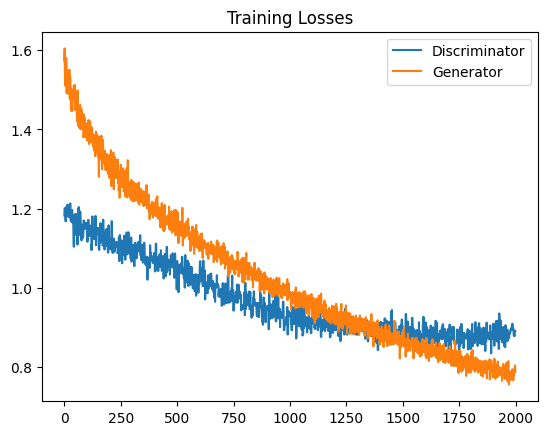

In [ ]:
# Plot the losses
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Extract normal and anomalous test data from the generators
x_test_normal, _ = generator_normal[0]  # Extract normal batch (replace [0] with the index you want)
x_test_anomalous, _ = generator_anomalous[0]  # Extract anomalous batch (replace [0] with the index you want)

# Reshape the data to remove the extra dimension (batch_size, 64, 1) -> (batch_size, 64)
x_test_normal = x_test_normal.reshape(x_test_normal.shape[0], x_test_normal.shape[1])
x_test_anomalous = x_test_anomalous.reshape(x_test_anomalous.shape[0], x_test_anomalous.shape[1])

# Pass through the generator to get reconstructions
reconstructed_normal = generator.predict(x_test_normal)
reconstructed_anomalous = generator.predict(x_test_anomalous)

# Compute reconstruction error (MSE)
mse_normal = np.mean(np.square(x_test_normal - reconstructed_normal), axis=1)
mse_anomalous = np.mean(np.square(x_test_anomalous - reconstructed_anomalous), axis=1)

# Compare the errors
print(f'Normal MSE: {np.mean(mse_normal)}')
print(f'Anomalous MSE: {np.mean(mse_anomalous)}')


Normal MSE: 2.878871342766659
Anomalous MSE: 8.564618315811394


In [ ]:
# Step 1: Pass normal and anomalous data through the discriminator
# Assuming x_test_normal and x_test_anomalous are already defined and reshaped as in the previous steps
discriminator_normal_pred = discriminator.predict(x_test_normal)
discriminator_anomalous_pred = discriminator.predict(x_test_anomalous)

# Step 2: Define the true labels
# For normal data, the true label is 1 (real)
y_true_normal = np.ones(len(discriminator_normal_pred))

# For anomalous data, the true label is 0 (fake/anomalous)
y_true_anomalous = np.zeros(len(discriminator_anomalous_pred))

# Step 3: Calculate MAE for normal data
mae_normal = mean_absolute_error(y_true_normal, discriminator_normal_pred)

# Step 4: Calculate MAE for anomalous data
mae_anomalous = mean_absolute_error(y_true_anomalous, discriminator_anomalous_pred)

# Step 5: Print the MAE values
print(f'MAE for normal data (should be close to 1): {mae_normal}')
print(f'MAE for anomalous data (should be close to 0): {mae_anomalous}')


MAE for normal data (should be close to 1): 0.17396728839958087
MAE for anomalous data (should be close to 0): 0.8087528389878571


In [ ]:
# Calculate the 95th percentile of the normal MSE as the threshold
threshold_mse = np.percentile(mse_normal, 95)
print(f"Threshold for MSE: {threshold_mse}")

# Similarly, you can calculate the threshold for MAE if you're using the discriminator's MAE
threshold_mae = np.percentile(mae_normal, 95)
print(f"Threshold for MAE: {threshold_mae}")


Threshold for MSE: 2.9201351748514934
Threshold for MAE: 0.17396728839958087


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

# Generate a range of possible thresholds
thresholds = np.linspace(0, max(np.max(mse_normal), np.max(mse_anomalous)), 100)

# Initialize lists to store the evaluation metrics for each threshold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Sweep through thresholds and compute metrics
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred_mse_normal = (mse_normal > threshold).astype(int)
    y_pred_mse_anomalous = (mse_anomalous > threshold).astype(int)

    # Concatenate the predictions
    y_pred_mse = np.concatenate([y_pred_mse_normal, y_pred_mse_anomalous])

    # True labels
    y_true_normal = np.zeros(len(mse_normal))
    y_true_anomalous = np.ones(len(mse_anomalous))
    y_true = np.concatenate([y_true_normal, y_true_anomalous])

    # Calculate evaluation metrics for the current threshold
    accuracy = accuracy_score(y_true, y_pred_mse)
    precision = precision_score(y_true, y_pred_mse, zero_division=0)  # Prevent precision from being undefined
    recall = recall_score(y_true, y_pred_mse)
    f1 = f1_score(y_true, y_pred_mse)

    # Store the metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Find the index of the best F1-score
best_f1_idx = np.argmax(f1_list)
best_threshold_f1 = thresholds[best_f1_idx]

# Generate classification report using the best threshold based on F1-score
y_pred_mse_best = np.concatenate([
    (mse_normal > best_threshold_f1).astype(int),
    (mse_anomalous > best_threshold_f1).astype(int)
])

# True labels
y_true = np.concatenate([np.zeros(len(mse_normal)), np.ones(len(mse_anomalous))])

# Generate the classification report
report = classification_report(y_true, y_pred_mse_best, target_names=['Normal', 'Anomalous'])

# Print the best threshold and the classification report
print(f"Best threshold based on F1-score: {best_threshold_f1}")
print(f"Classification Report (Using Best Threshold):\n{report}")


Best threshold based on F1-score: 3.020532633033039
Classification Report (Using Best Threshold):
              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94      1024
   Anomalous       1.00      0.87      0.93      1024

    accuracy                           0.93      2048
   macro avg       0.94      0.93      0.93      2048
weighted avg       0.94      0.93      0.93      2048



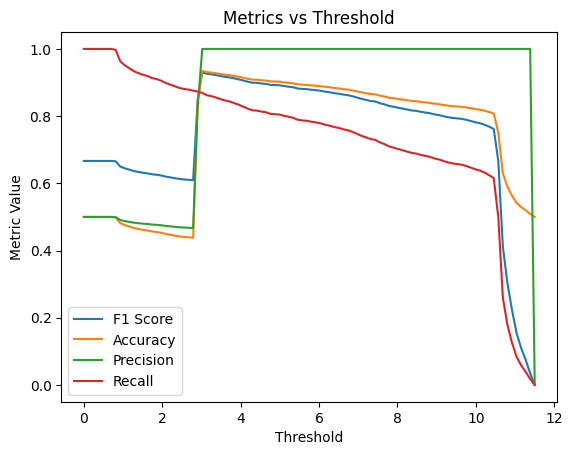

In [ ]:
import matplotlib.pyplot as plt

# Plot F1-score vs Threshold
plt.plot(thresholds, f1_list, label='F1 Score')
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs Threshold')
plt.legend()
plt.show()
